In [1]:
import os
import glob
import scanpy as sc
import scirpy as ir
import muon as mu
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt, cm as mpl_cm
import sys
from pathlib import Path
from matplotlib_venn import venn3
import scipy

sys.path.insert(0, '/mnt/efs/hdiao/Projects/Tools')
import sc_tl

%matplotlib inline

sc.set_figure_params(frameon=False, figsize=(4, 4))
sc.settings.verbosity = 0  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.1 pandas==1.5.0 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.11 louvain==0.7.1 pynndescent==0.5.7


In [2]:
sp_name = "T"

###----- Setup output directories
wk_dir = "/mnt/efs/hdiao/Projects/BNT162b4_scRNA/1_scanpy_scirpy/1_%s"%sp_name
de_dir = "%s/1_DE"%(wk_dir)
Path(wk_dir).mkdir(parents=True, exist_ok=True)
Path(de_dir).mkdir(parents=True, exist_ok=True)

###----- Read feature reference and cite
sp_h5ad = "%s/%s_fltRS_leiden_vdj.h5ad"%(wk_dir, sp_name)
adata = sc.read_h5ad(sp_h5ad)

gene_n = len(adata.raw.var)
all_genes = adata.raw.var.index.tolist()

###----- Retrieve raw data matrix
adata_raw_expr = pd.DataFrame.sparse.from_spmatrix(adata.raw.X)
adata_raw_expr.columns = adata.raw.var_names

###----- Filter out genes of low expression & Filter out CITE labels
cite_index = set(adata.var[adata.var['feature_types'] != 'Gene Expression'].index)

adata_raw_expr_mean = pd.DataFrame(adata_raw_expr.mean())

flt_genes = [x for x in adata_raw_expr_mean[adata_raw_expr_mean[0] > 0.01].index if x not in cite_index]

# Cluster v.s. Rest

/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


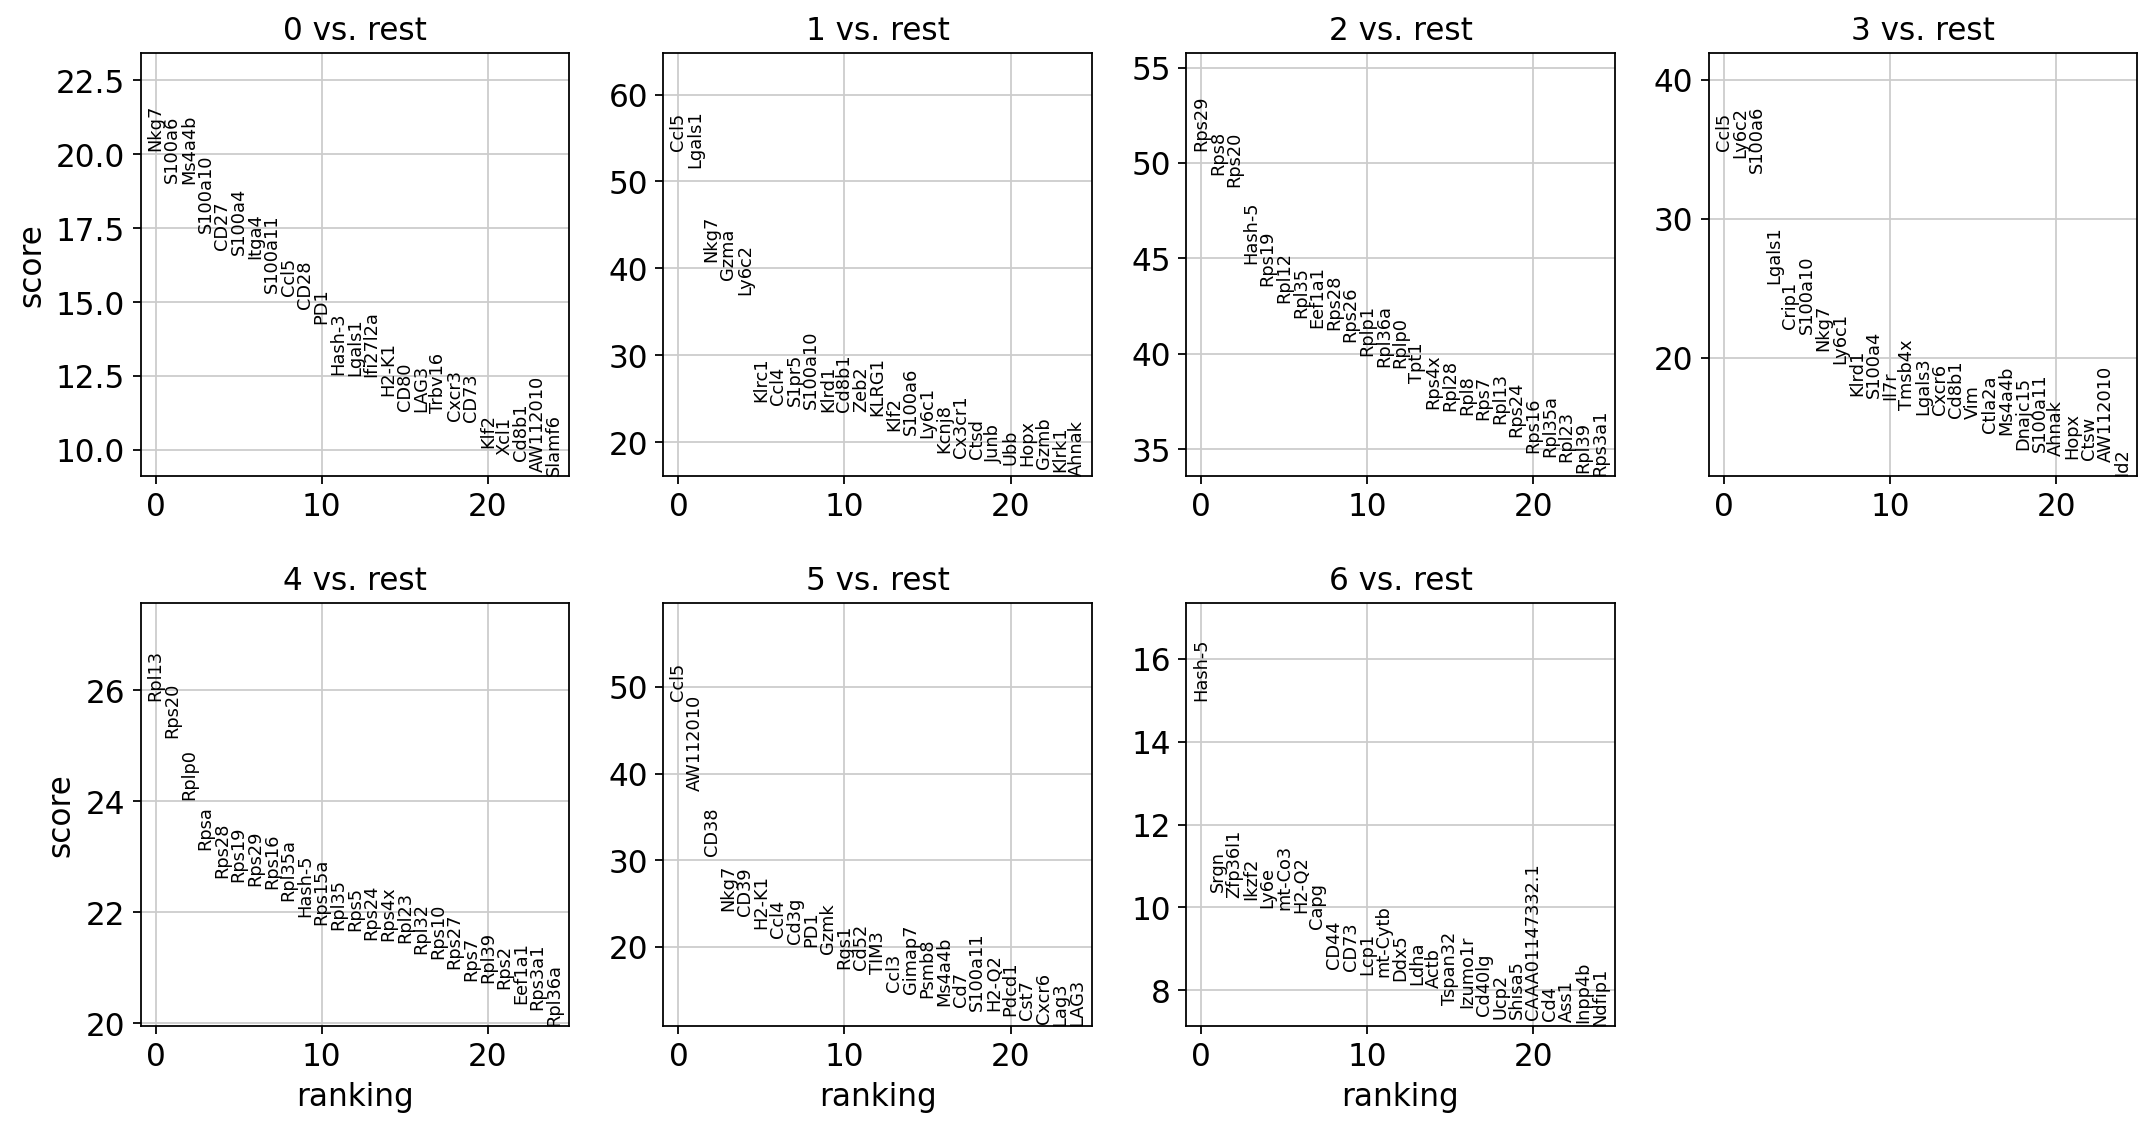

/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


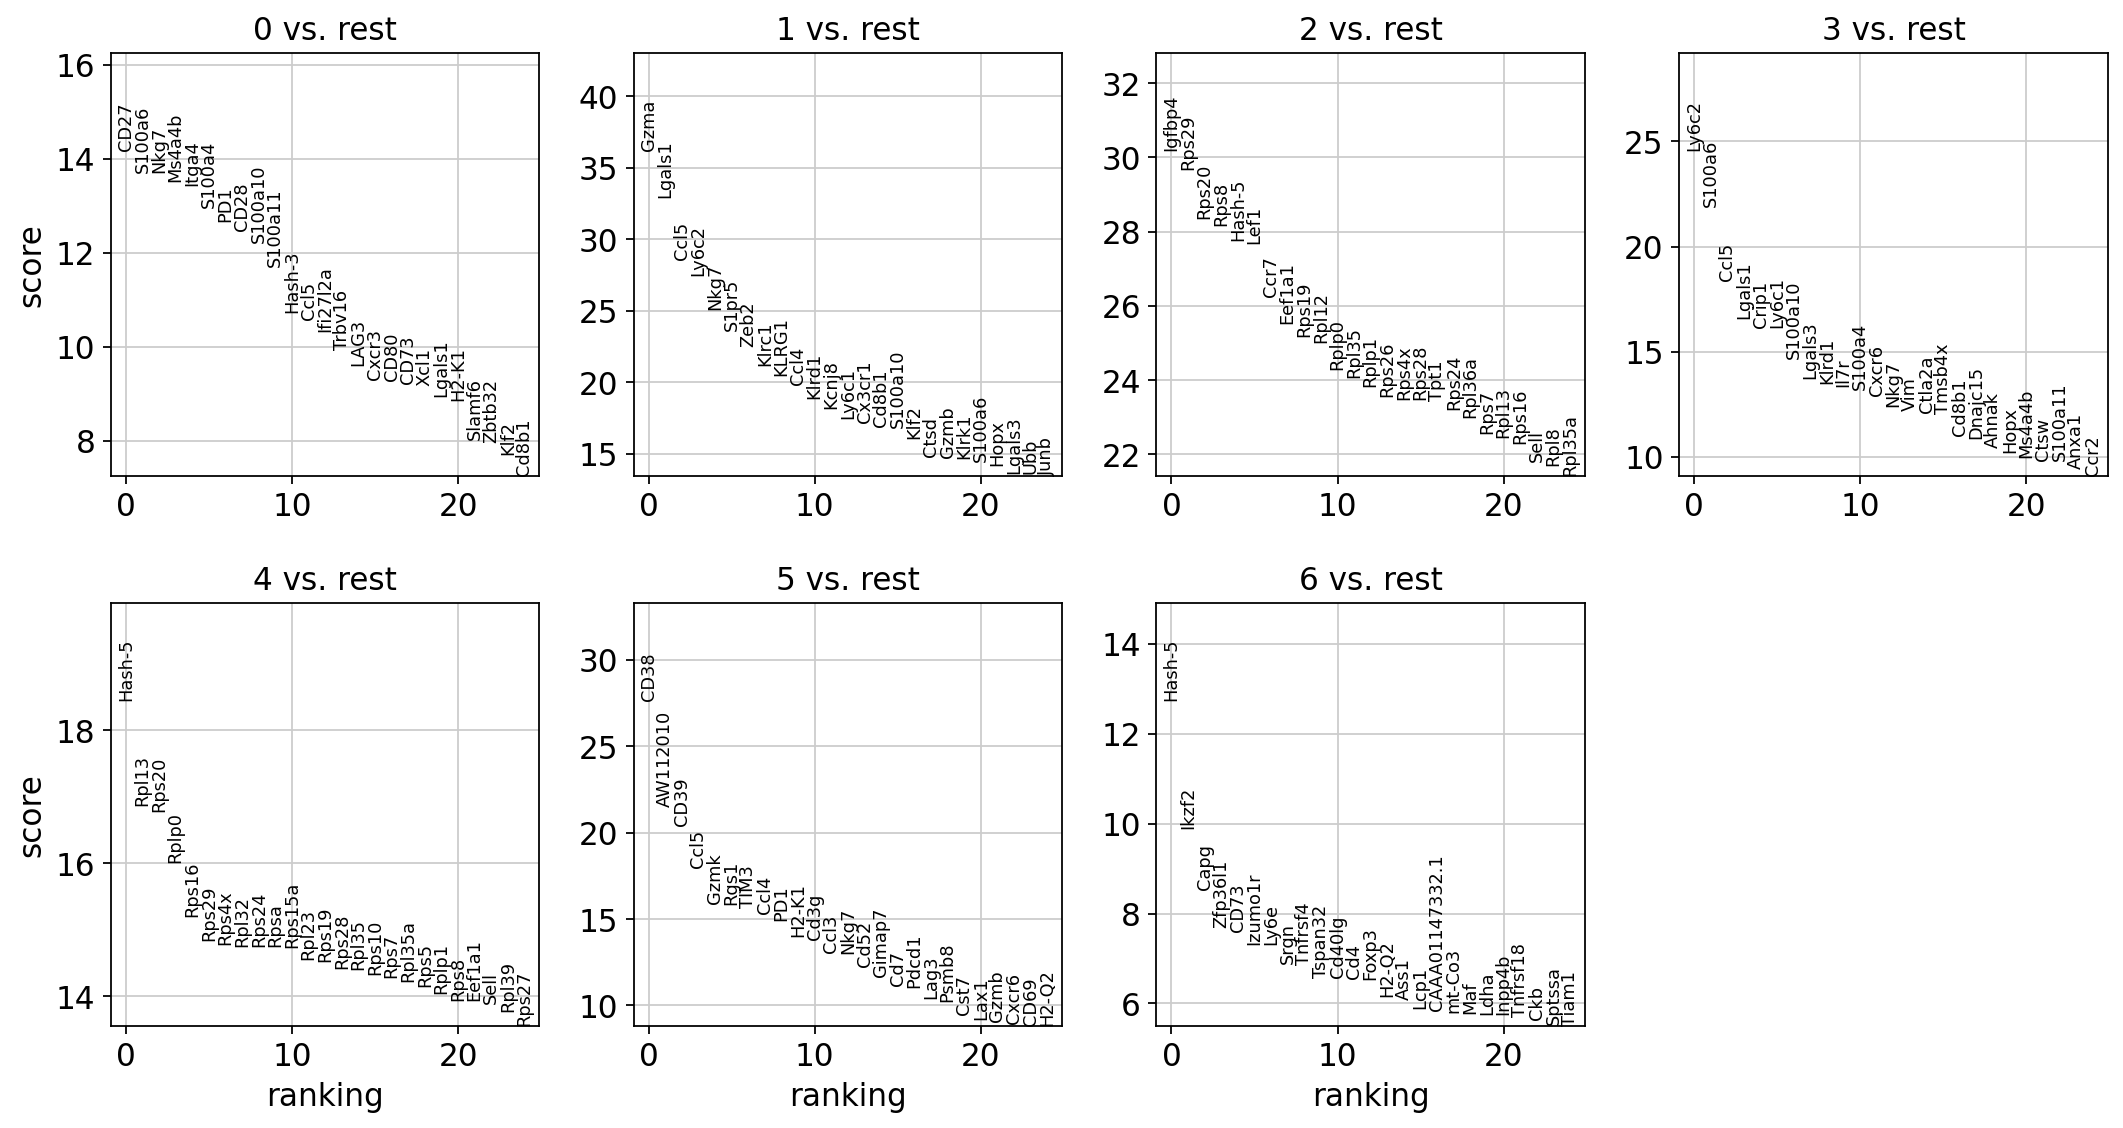

/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


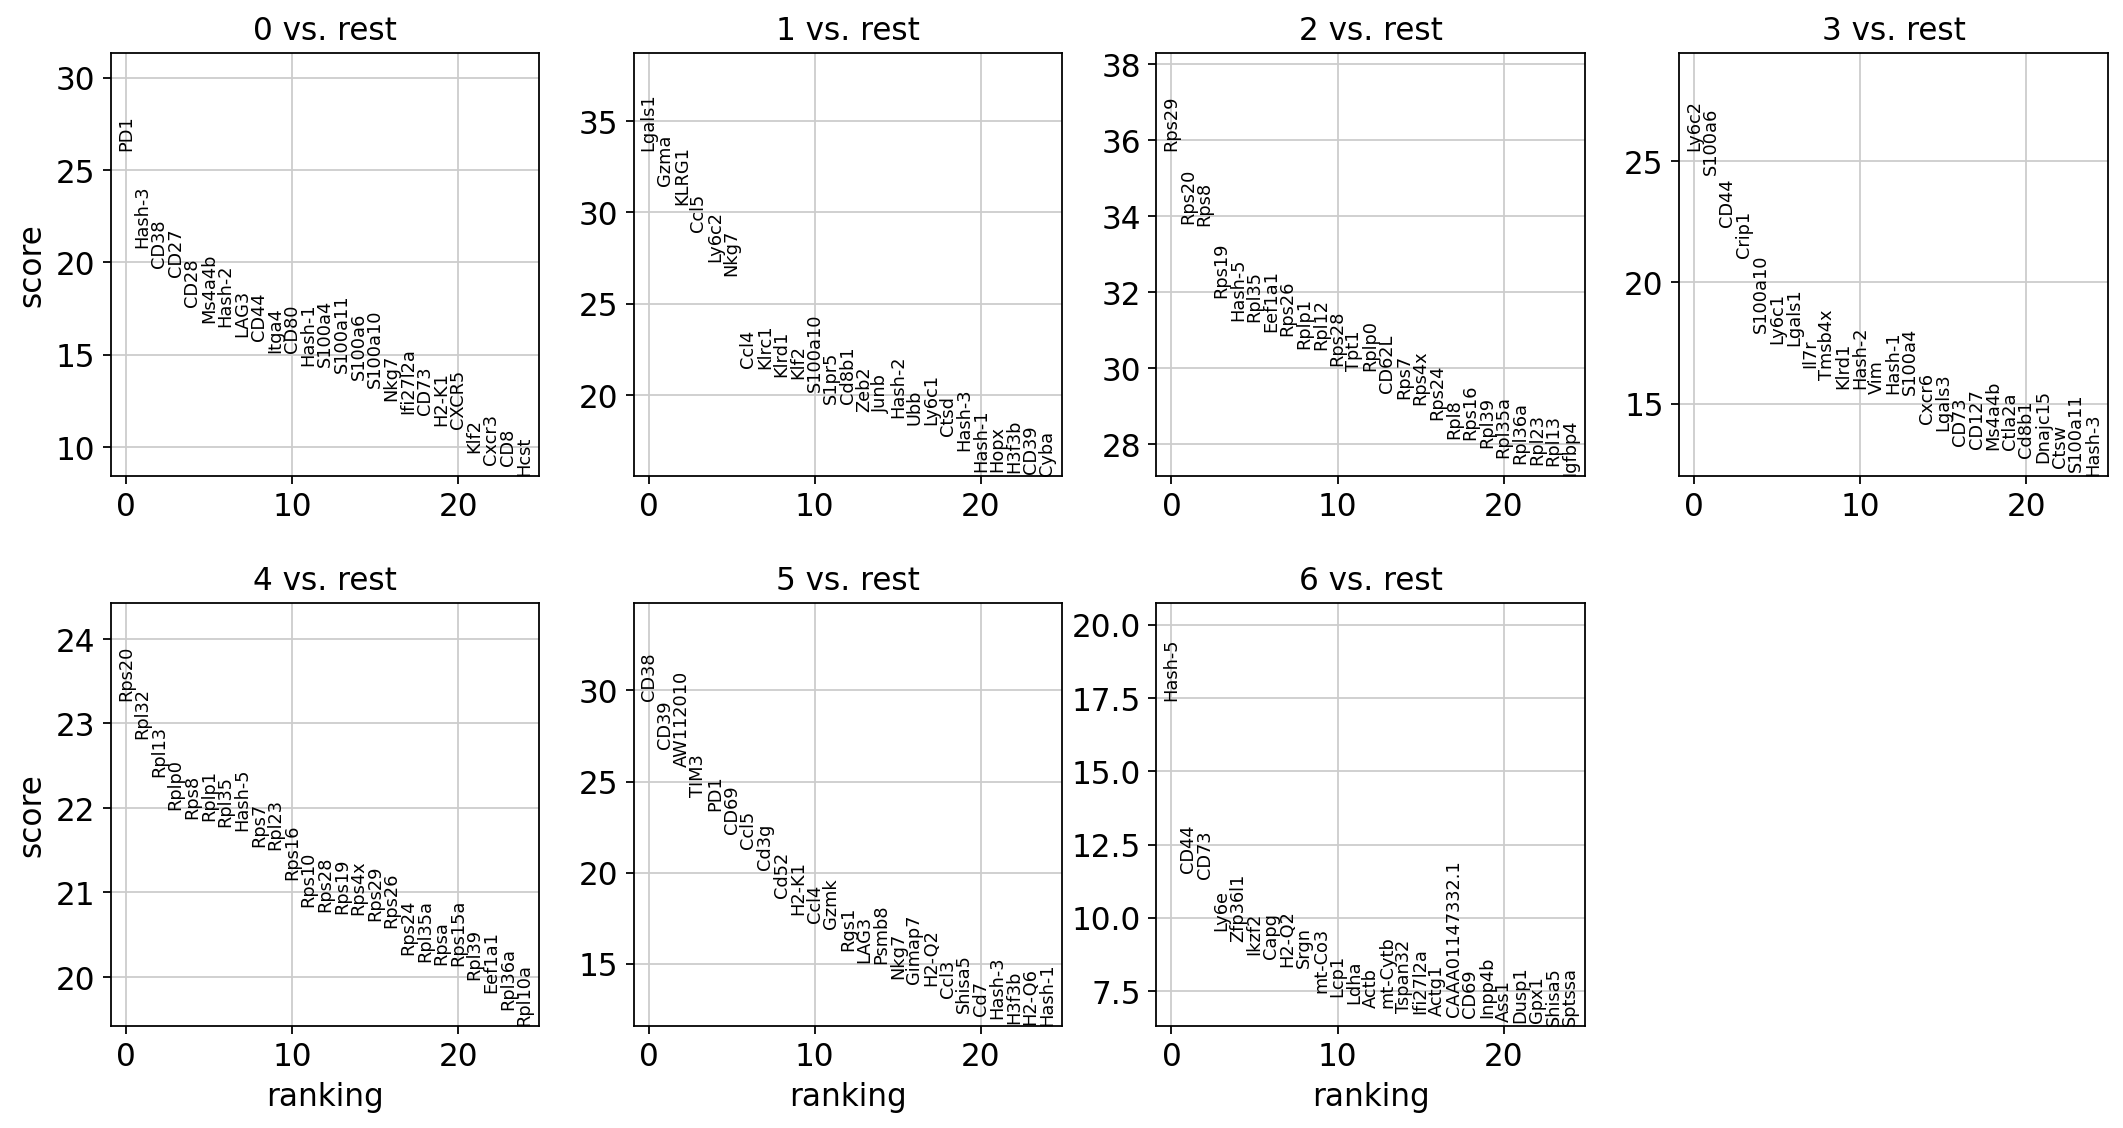

/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


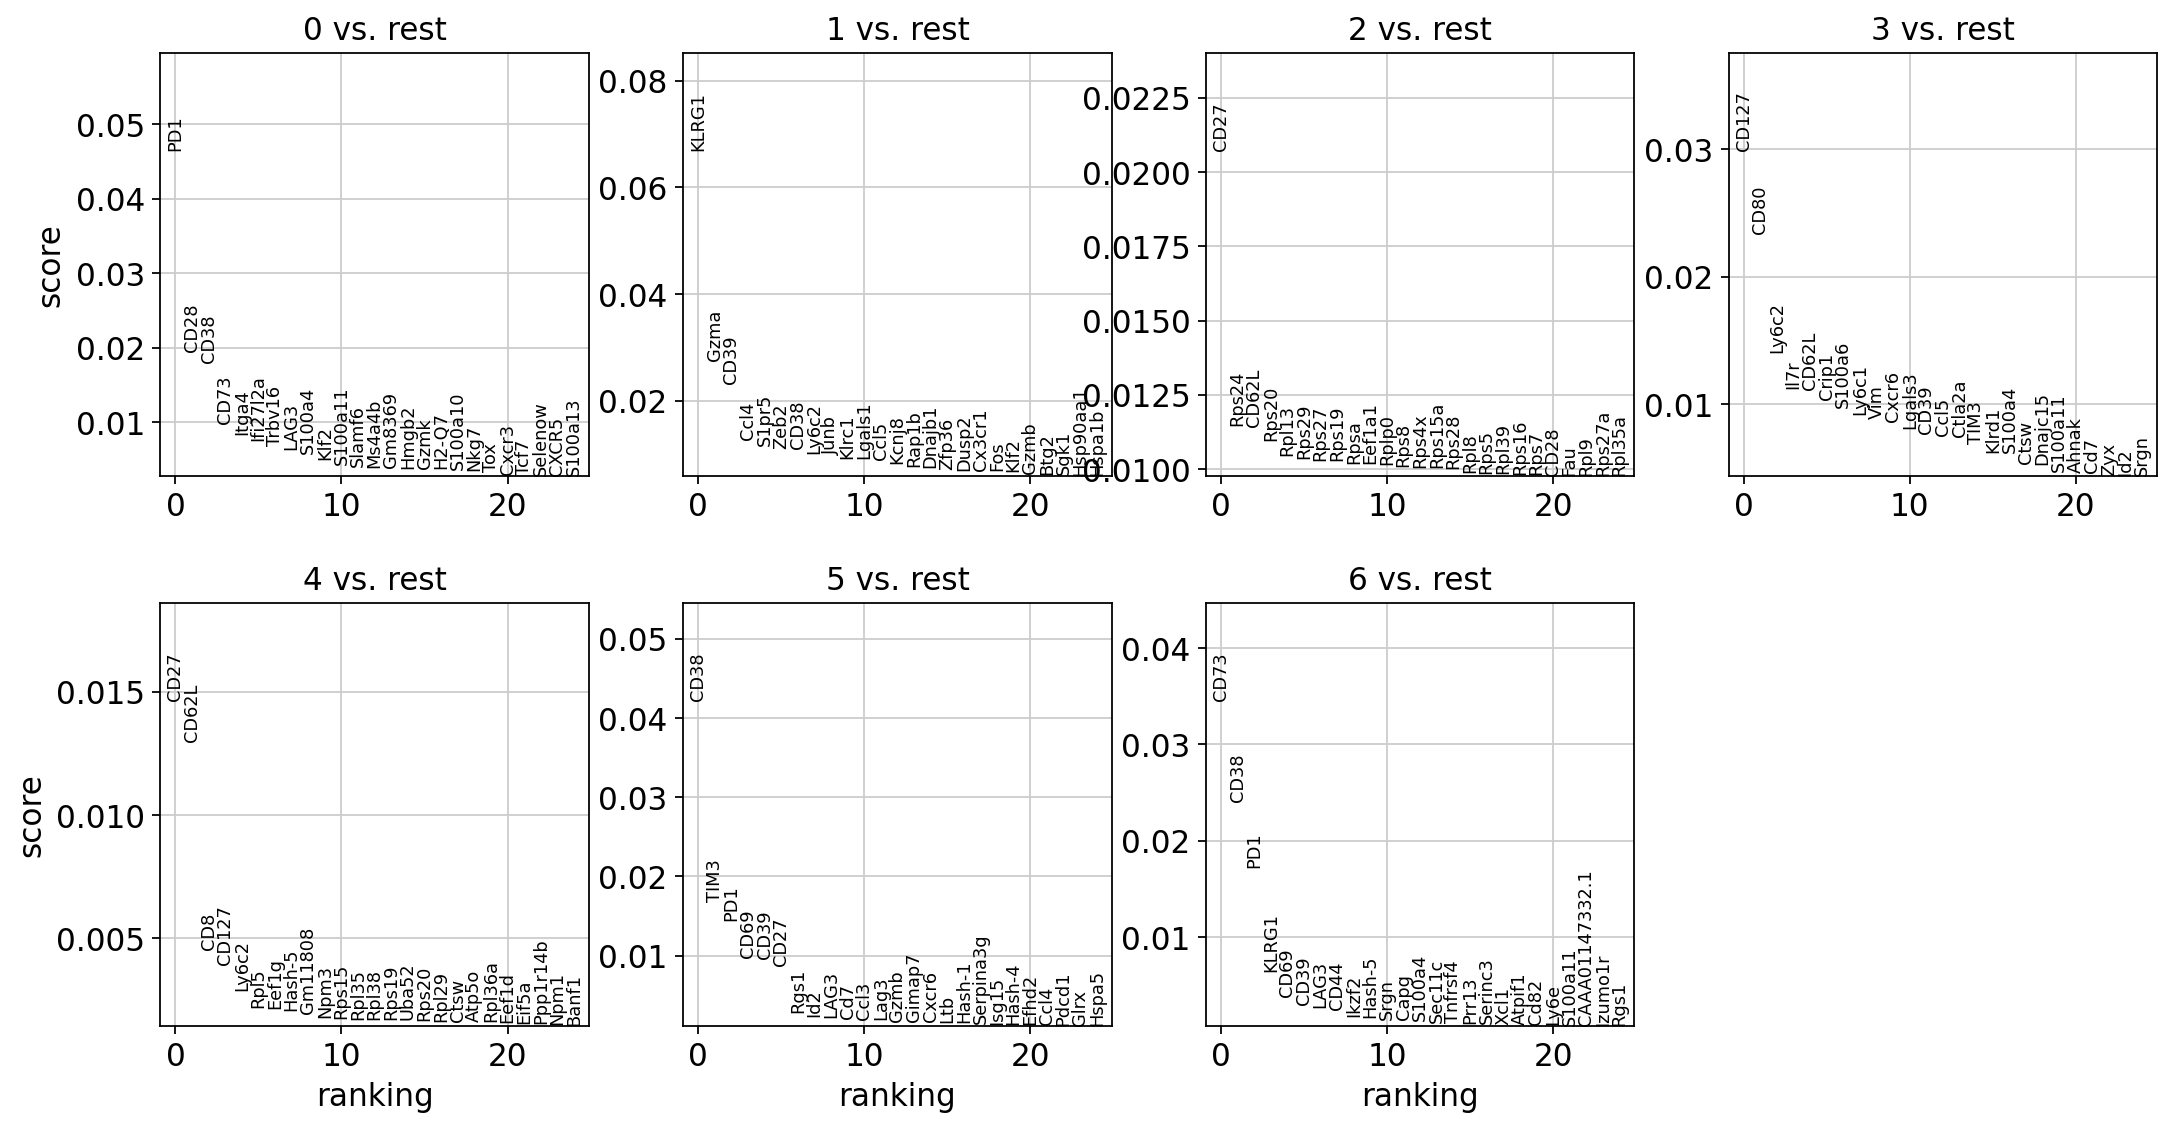

/tmp/ipykernel_241377/1821267452.py:54: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_differential.csv"%l_t, index=False)
/tmp/ipykernel_241377/1821267452.py:54: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_differential.csv"%l_t, index=False)
/tmp/ipykernel_241377/1821267452.py:54: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_differe

In [3]:
de_dir_use = "%s/cluster_vs_rest"%de_dir
Path(de_dir_use).mkdir(parents=True, exist_ok=True)

obs_useCol = 'leiden'
labels_uniq = list(set(adata.obs[obs_useCol]))
labels_uniq.sort()

###----- Individual tests
sc.tl.rank_genes_groups(adata, obs_useCol, method='t-test', key_added='t-test',n_genes=gene_n)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key='t-test')
sc.tl.rank_genes_groups(adata, obs_useCol, method='t-test_overestim_var', key_added = "t-test_ov",n_genes=gene_n)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "t-test_ov")
sc.tl.rank_genes_groups(adata, obs_useCol, method='wilcoxon', key_added = "wilcoxon",n_genes=gene_n)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key="wilcoxon")
sc.tl.rank_genes_groups(adata, obs_useCol, method='logreg',key_added = "logreg",n_genes=gene_n)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "logreg")

###----- Overlap
os.chdir(de_dir_use)
cps = ['wilcoxon', 't-test', 't-test_ov','logreg']

for l_t in labels_uniq:
    # Test result summary dataframe with averge gene expression per condition
    adata.obs['cat'] = [x if x == l_t else 'other' for x in adata.obs[obs_useCol]]
    adata_raw_expr_use_df = adata_raw_expr.copy()
    adata_raw_expr_use_df['cat'] = adata.obs['cat'].tolist()
    avg_expr_df = adata_raw_expr_use_df.groupby('cat').mean().T
    avg_expr_df = avg_expr_df.reset_index()
    avg_expr_df.columns = ['gene_names'] + avg_expr_df.columns.tolist()[1:]
    genes_df_l_t = avg_expr_df
    
    dict_l_t = {}
    for cp in cps:
        if cp != 'logreg':
            cp_names = adata.uns[cp]['names'][l_t]
            cp_fc = adata.uns[cp]['logfoldchanges'][l_t]
            cp_score = adata.uns[cp]['scores'][l_t]
            cp_padj = adata.uns[cp]['pvals_adj'][l_t]
            if (cp == 't-test_ov'):
                cp_name = 't-test_overestim_var'
                cp_df = pd.DataFrame({"gene_names":cp_names, "%s_logfc"%cp_name: cp_fc, "%s_padj"%cp_name:cp_padj, "%s_score"%cp_name:cp_score})
            else:
                cp_df = pd.DataFrame({"gene_names":cp_names, "%s_logfc"%cp: cp_fc, "%s_padj"%cp:cp_padj, "%s_score"%cp:cp_score})

            genes_df_l_t = pd.merge(genes_df_l_t, cp_df, how='outer', on="gene_names")
            cp_df = cp_df[cp_df[cp_df.columns[2]] <= 0.05]
            cp_df = cp_df[cp_df[cp_df.columns[1]] > 0]
            dict_l_t[cp] = cp_df['gene_names']
        else:
            cp_names = adata.uns[cp]['names'][l_t]
            cp_score = adata.uns[cp]['scores'][l_t]
            cp_df = pd.DataFrame({"gene_names":cp_names,  "%s_score"%cp:cp_score})
            genes_df_l_t = pd.merge(genes_df_l_t, cp_df, how='outer', on="gene_names")
    genes_df_l_t.to_csv("%s_differential.csv"%l_t, index=False)
    
    venn3([set(dict_l_t[cps[0]]), set(dict_l_t[cps[1]]), set(dict_l_t[cps[2]])], tuple(cps[:3]))
    
    outname = "%s_venn.png"%l_t
    plt.savefig(outname)
    plt.close()

# Group v.s. Rest

/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


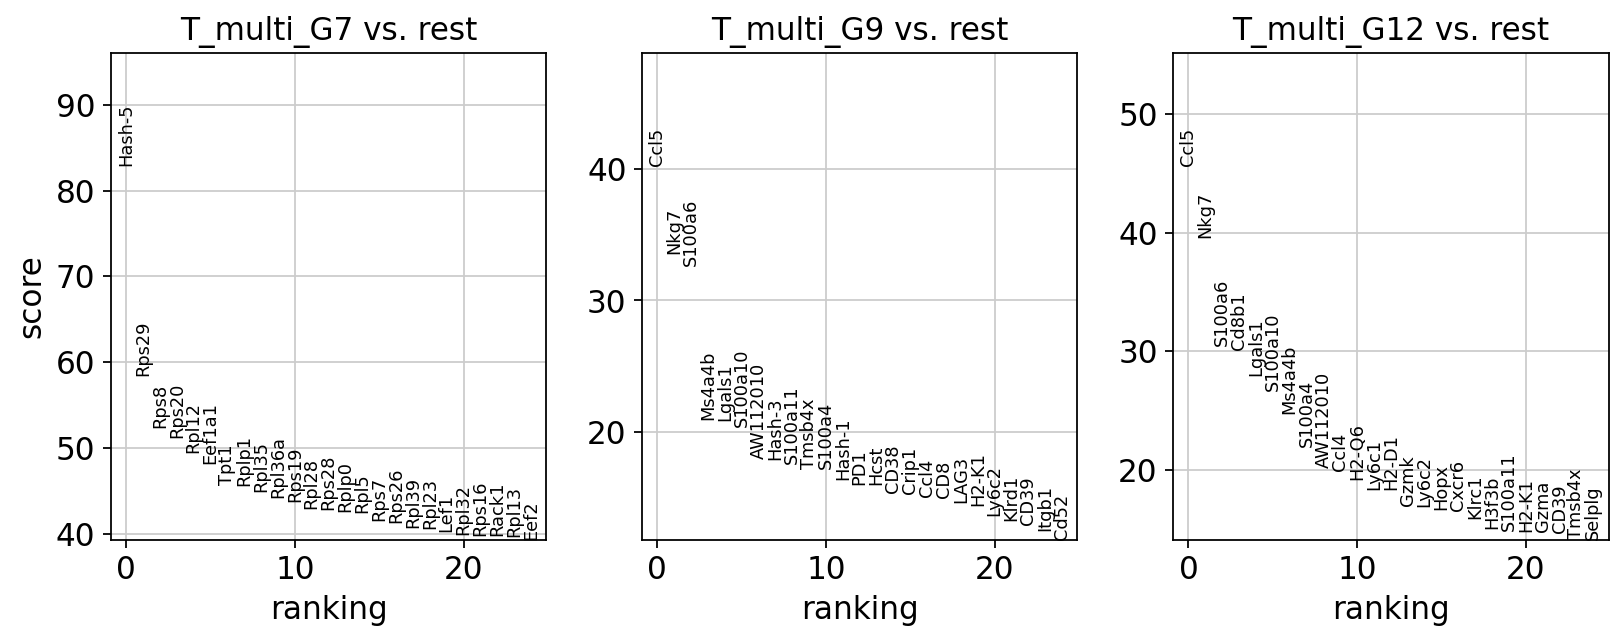

/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


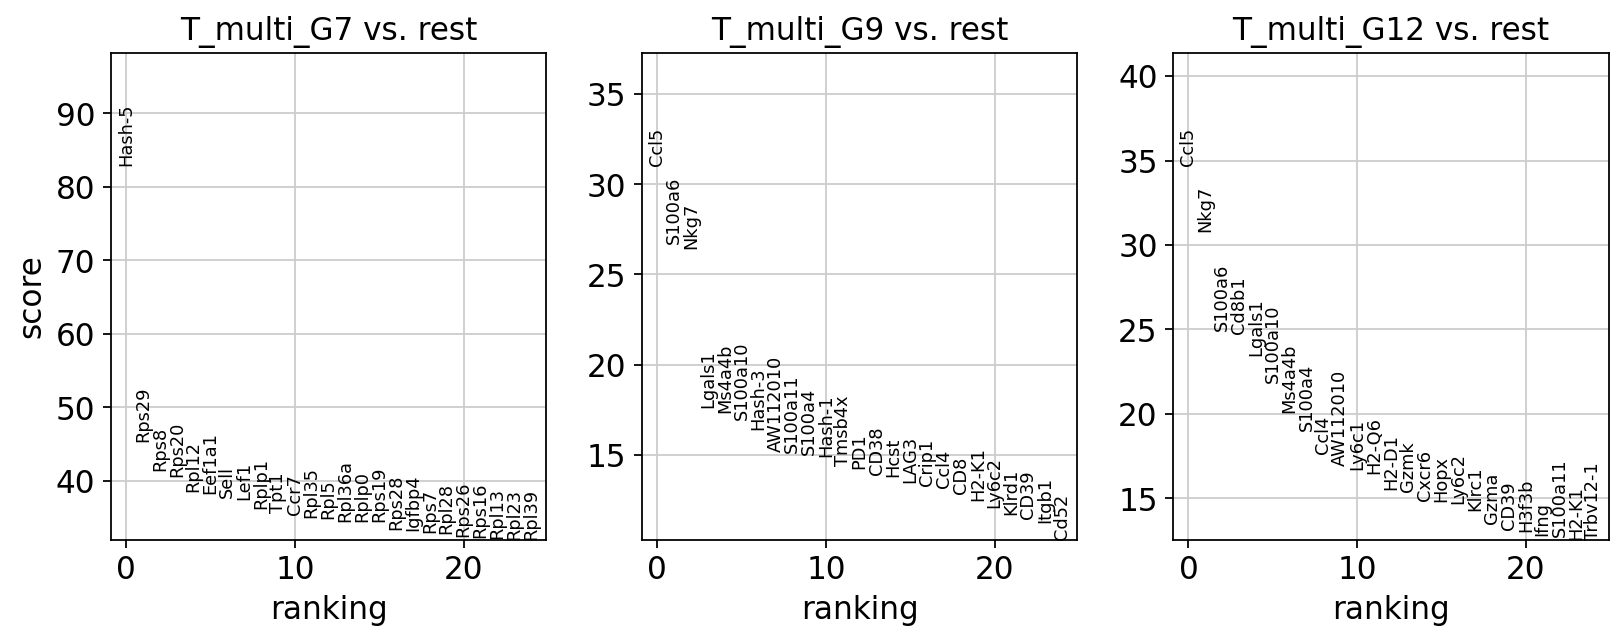

/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


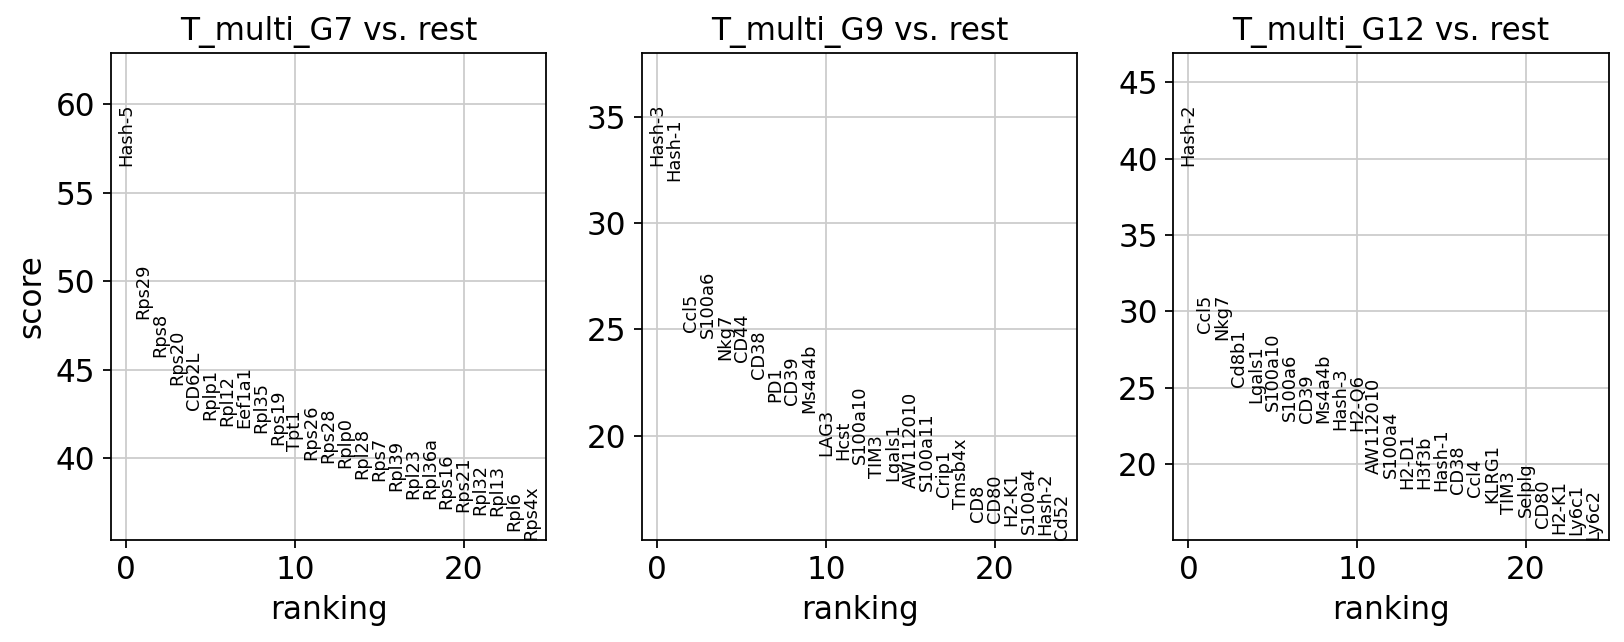

/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


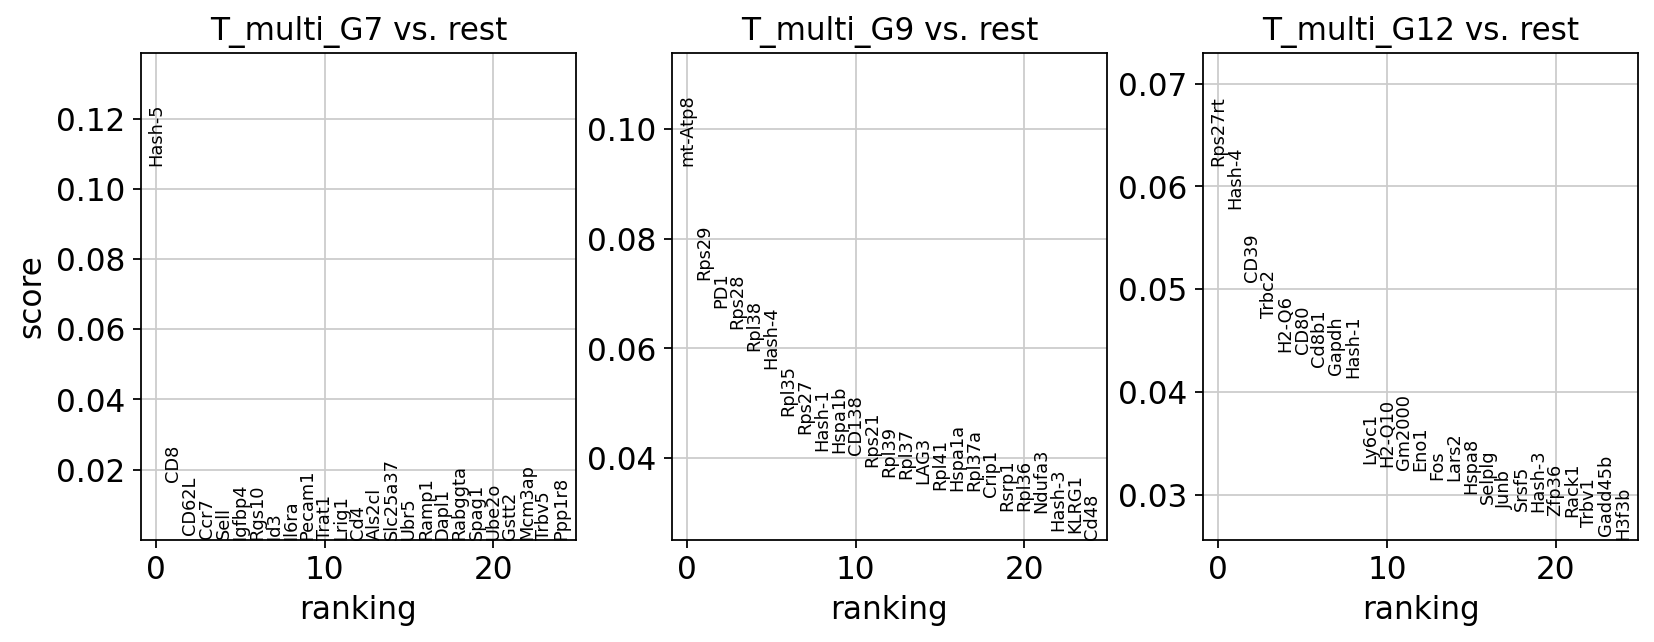

/tmp/ipykernel_241377/3557711676.py:54: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_differential.csv"%l_t, index=False)
/tmp/ipykernel_241377/3557711676.py:54: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_differential.csv"%l_t, index=False)
/tmp/ipykernel_241377/3557711676.py:54: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_differe

In [4]:
de_dir_use = "%s/group_vs_rest"%de_dir
Path(de_dir_use).mkdir(parents=True, exist_ok=True)

obs_useCol = 'group'
labels_uniq = list(set(adata.obs[obs_useCol]))
labels_uniq.sort()

###----- Individual tests
sc.tl.rank_genes_groups(adata, obs_useCol, method='t-test', key_added='t-test',n_genes=gene_n)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key='t-test')
sc.tl.rank_genes_groups(adata, obs_useCol, method='t-test_overestim_var', key_added = "t-test_ov",n_genes=gene_n)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "t-test_ov")
sc.tl.rank_genes_groups(adata, obs_useCol, method='wilcoxon', key_added = "wilcoxon",n_genes=gene_n)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key="wilcoxon")
sc.tl.rank_genes_groups(adata, obs_useCol, method='logreg',key_added = "logreg",n_genes=gene_n)
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "logreg")

###----- Overlap
os.chdir(de_dir_use)
cps = ['wilcoxon', 't-test', 't-test_ov','logreg']

for l_t in labels_uniq:
    # Test result summary dataframe with averge gene expression per condition
    adata.obs['cat'] = [x if x == l_t else 'other' for x in adata.obs[obs_useCol]]
    adata_raw_expr_use_df = adata_raw_expr.copy()
    adata_raw_expr_use_df['cat'] = adata.obs['cat'].tolist()
    avg_expr_df = adata_raw_expr_use_df.groupby('cat').mean().T
    avg_expr_df = avg_expr_df.reset_index()
    avg_expr_df.columns = ['gene_names'] + avg_expr_df.columns.tolist()[1:]
    genes_df_l_t = avg_expr_df
    
    dict_l_t = {}
    for cp in cps:
        if cp != 'logreg':
            cp_names = adata.uns[cp]['names'][l_t]
            cp_fc = adata.uns[cp]['logfoldchanges'][l_t]
            cp_score = adata.uns[cp]['scores'][l_t]
            cp_padj = adata.uns[cp]['pvals_adj'][l_t]
            if (cp == 't-test_ov'):
                cp_name = 't-test_overestim_var'
                cp_df = pd.DataFrame({"gene_names":cp_names, "%s_logfc"%cp_name: cp_fc, "%s_padj"%cp_name:cp_padj, "%s_score"%cp_name:cp_score})
            else:
                cp_df = pd.DataFrame({"gene_names":cp_names, "%s_logfc"%cp: cp_fc, "%s_padj"%cp:cp_padj, "%s_score"%cp:cp_score})

            genes_df_l_t = pd.merge(genes_df_l_t, cp_df, how='outer', on="gene_names")
            cp_df = cp_df[cp_df[cp_df.columns[2]] <= 0.05]
            cp_df = cp_df[cp_df[cp_df.columns[1]] > 0]
            dict_l_t[cp] = cp_df['gene_names']
        else:
            cp_names = adata.uns[cp]['names'][l_t]
            cp_score = adata.uns[cp]['scores'][l_t]
            cp_df = pd.DataFrame({"gene_names":cp_names,  "%s_score"%cp:cp_score})
            genes_df_l_t = pd.merge(genes_df_l_t, cp_df, how='outer', on="gene_names")
    genes_df_l_t.to_csv("%s_differential.csv"%l_t, index=False)
    
    venn3([set(dict_l_t[cps[0]]), set(dict_l_t[cps[1]]), set(dict_l_t[cps[2]])], tuple(cps[:3]))
    
    outname = "%s_venn.png"%l_t
    plt.savefig(outname)
    plt.close()

# Cluster v.s. Cluster 

['0', '1']
0 1 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


0 1 t-test
0 1 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


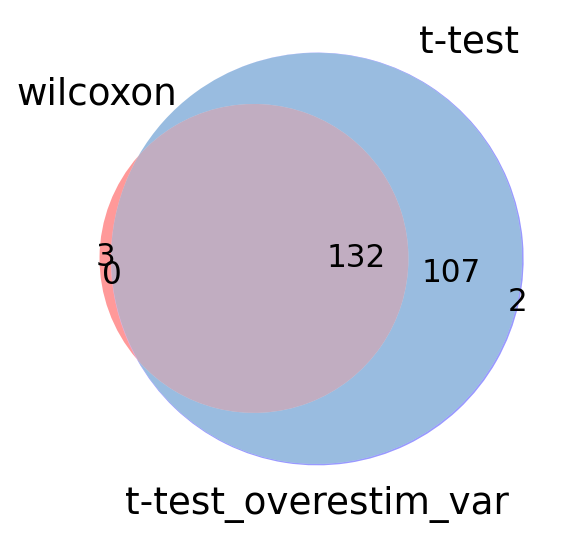

1 0 wilcoxon
1 0 t-test
1 0 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


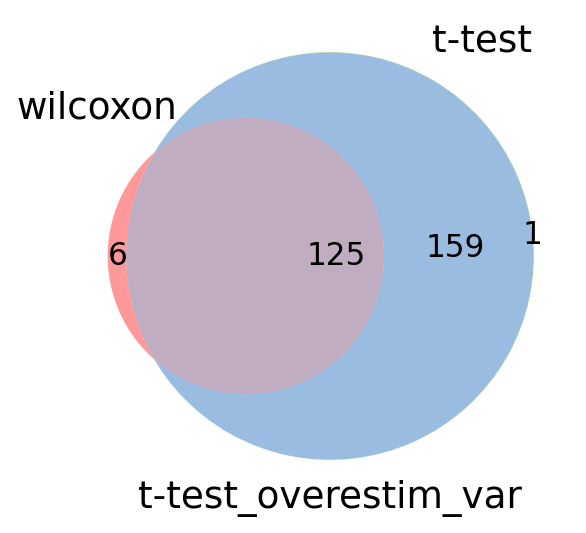

['0', '2']
0 2 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


0 2 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


0 2 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


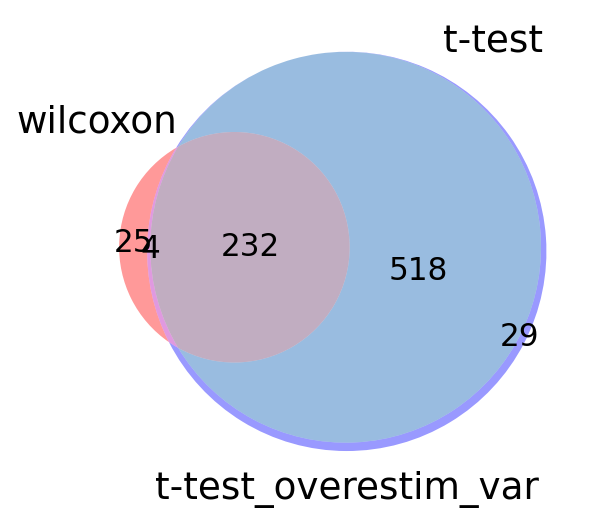

2 0 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 0 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 0 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


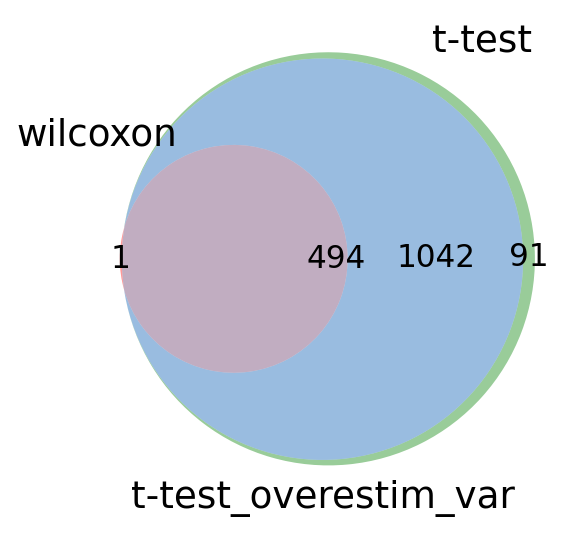

['0', '3']
0 3 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


0 3 t-test
0 3 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


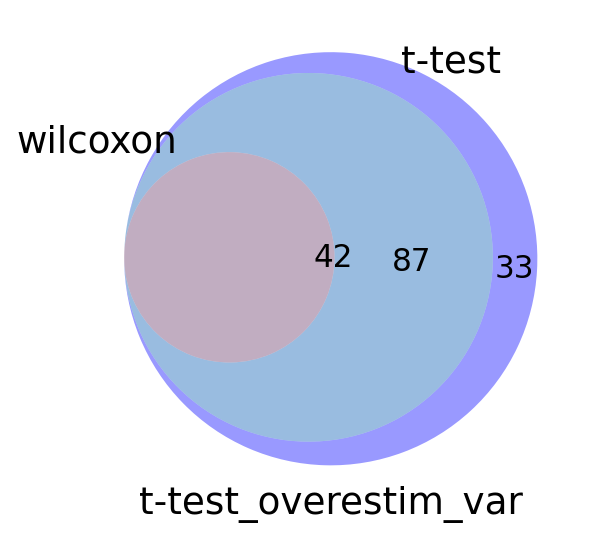

3 0 wilcoxon
3 0 t-test
3 0 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


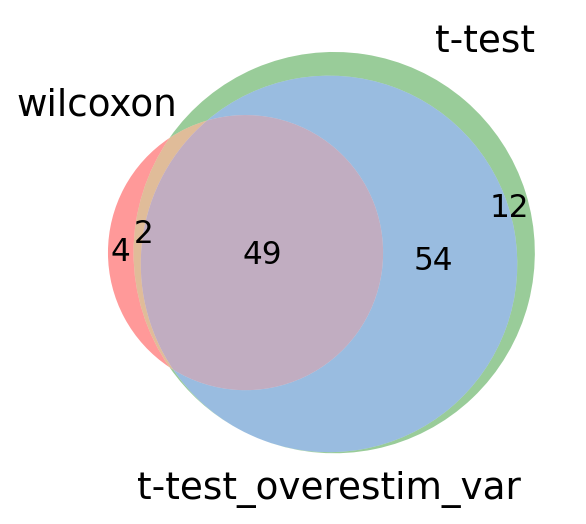

['0', '4']
0 4 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


0 4 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


0 4 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


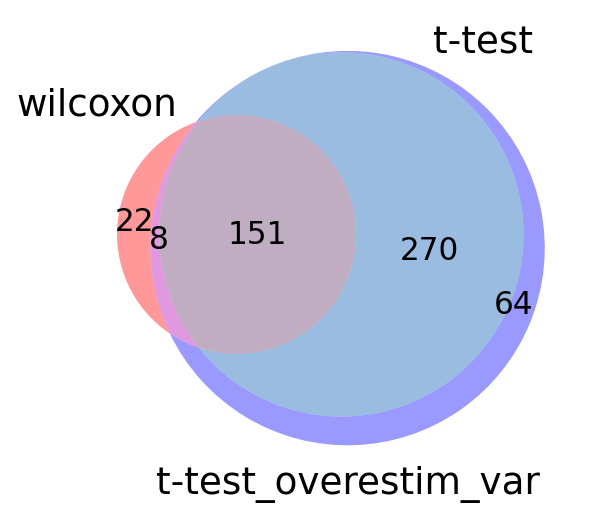

4 0 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 0 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 0 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


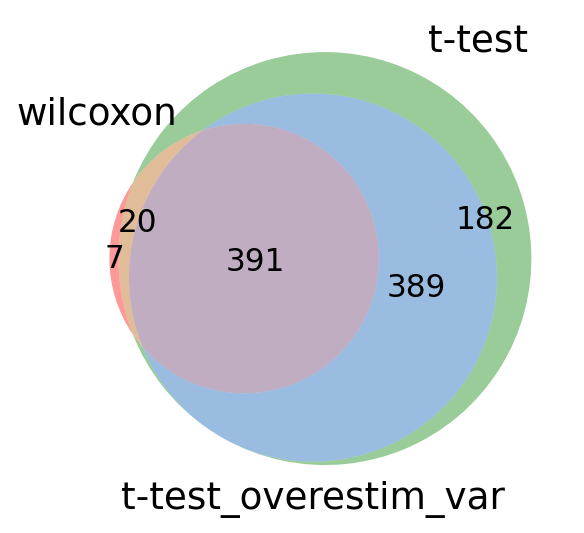

['0', '5']
0 5 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


0 5 t-test
0 5 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


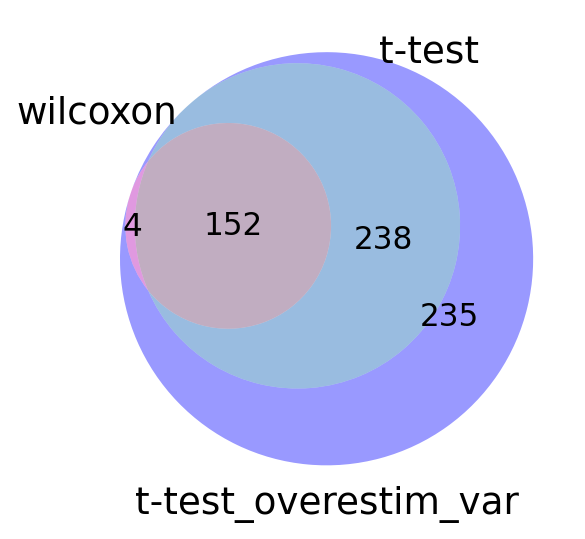

5 0 wilcoxon
5 0 t-test
5 0 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


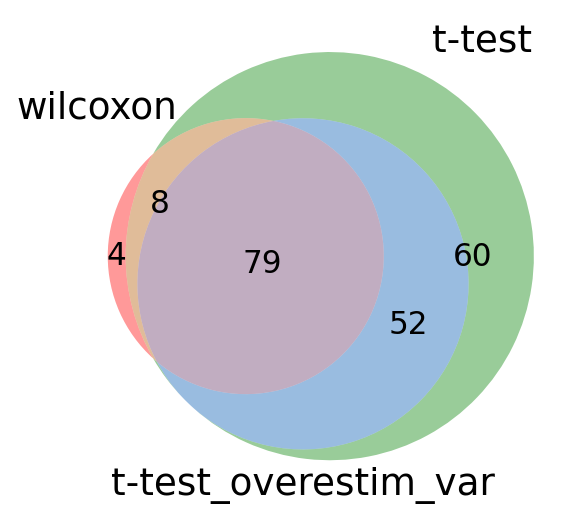

['0', '6']
0 6 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


0 6 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


0 6 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


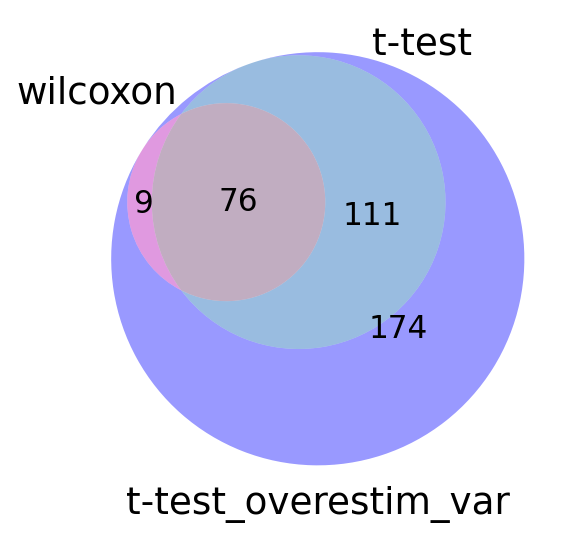

6 0 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 0 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 0 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


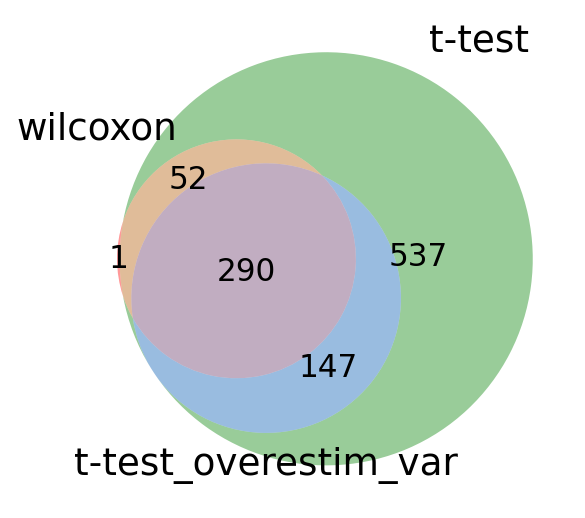

['0', '1']
0 1 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


0 1 t-test
0 1 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


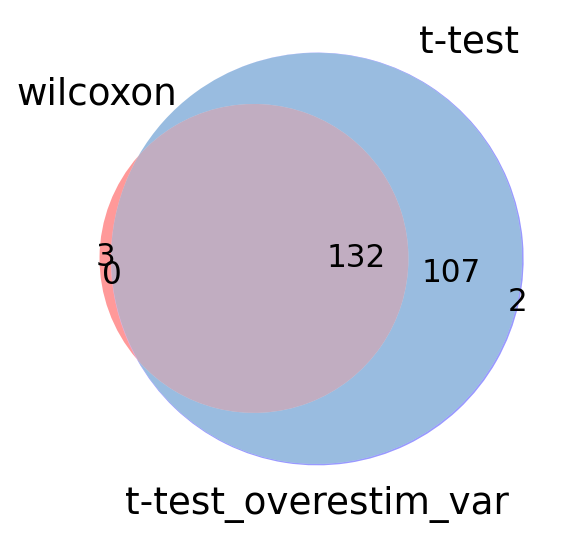

1 0 wilcoxon
1 0 t-test
1 0 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


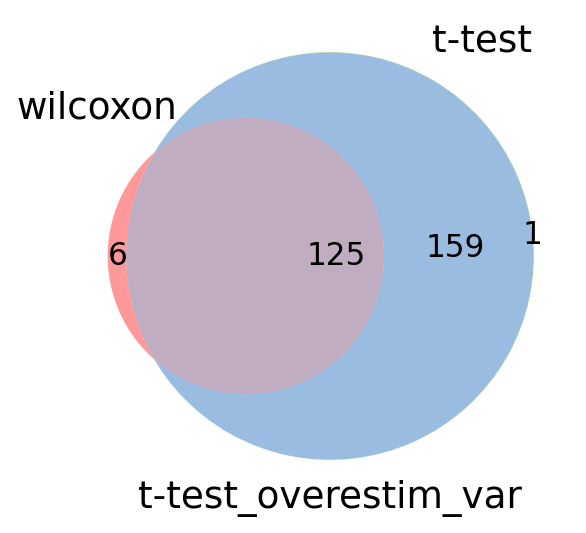

['1', '2']
1 2 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


1 2 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


1 2 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


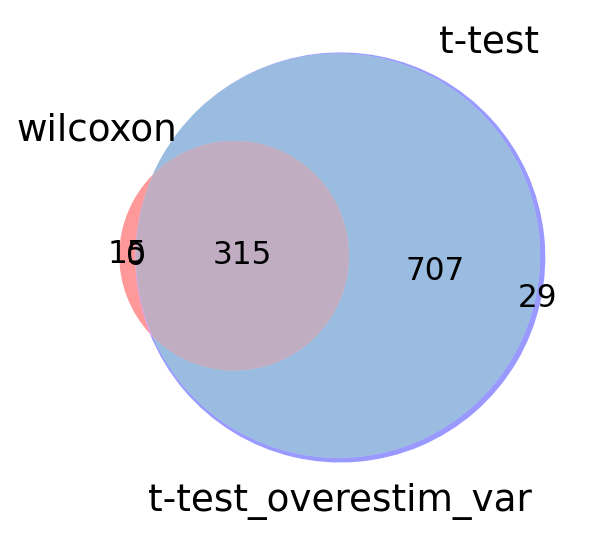

2 1 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 1 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 1 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


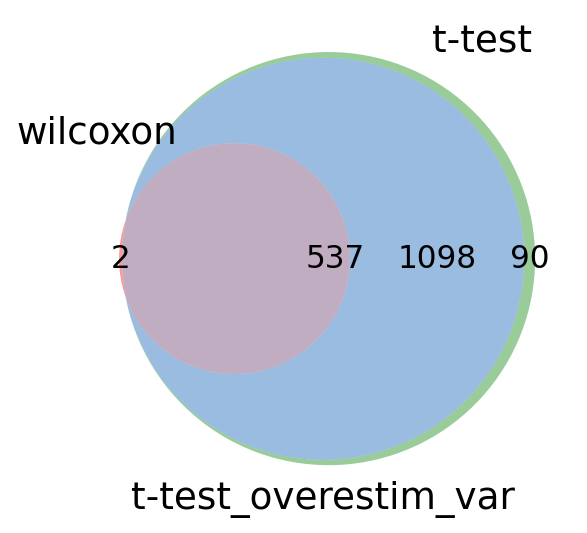

['1', '3']
1 3 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


1 3 t-test
1 3 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


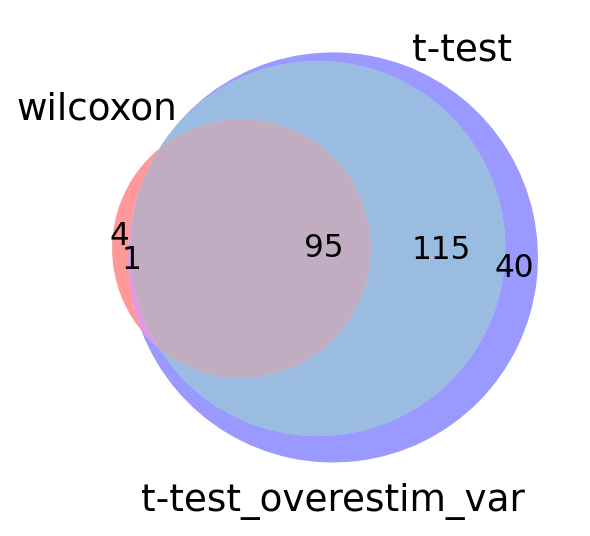

3 1 wilcoxon
3 1 t-test
3 1 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


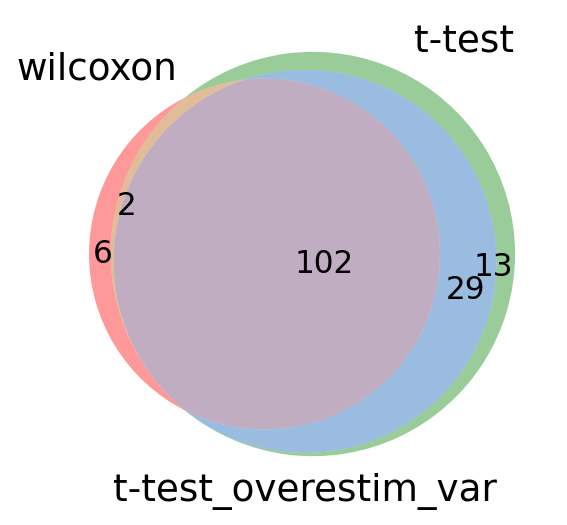

['1', '4']
1 4 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


1 4 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


1 4 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


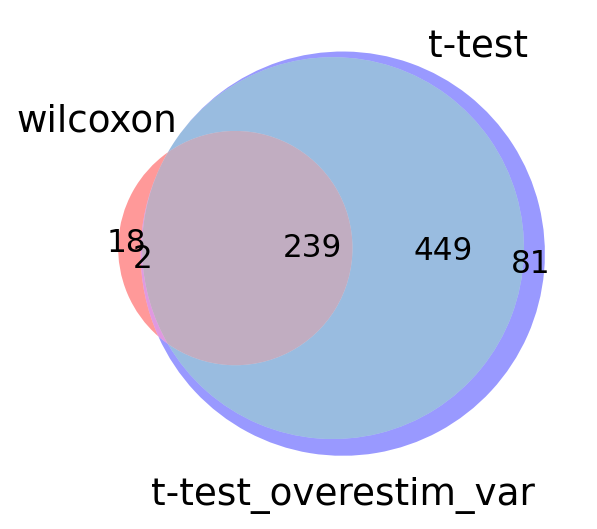

4 1 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 1 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 1 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


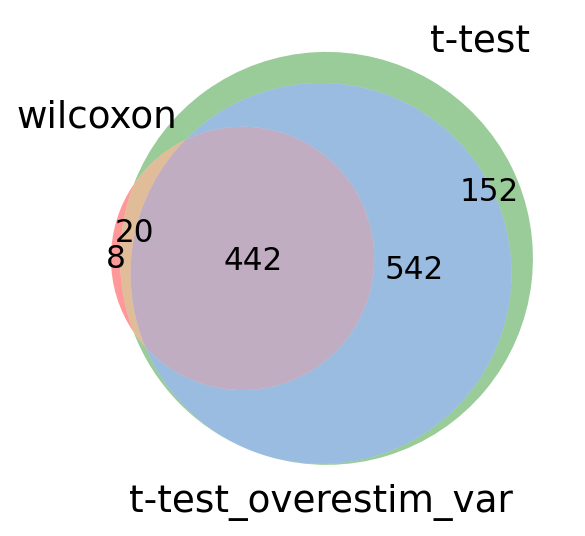

['1', '5']
1 5 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


1 5 t-test
1 5 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


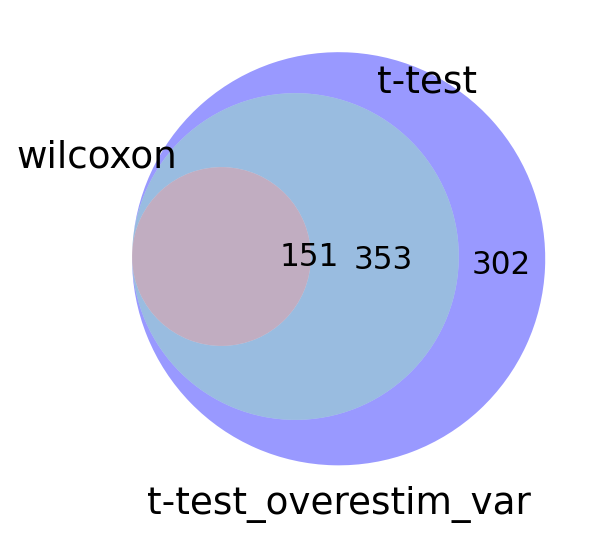

5 1 wilcoxon
5 1 t-test
5 1 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


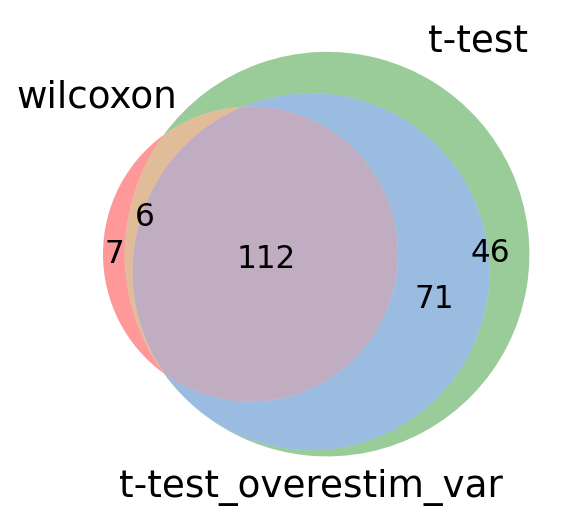

['1', '6']
1 6 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


1 6 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


1 6 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


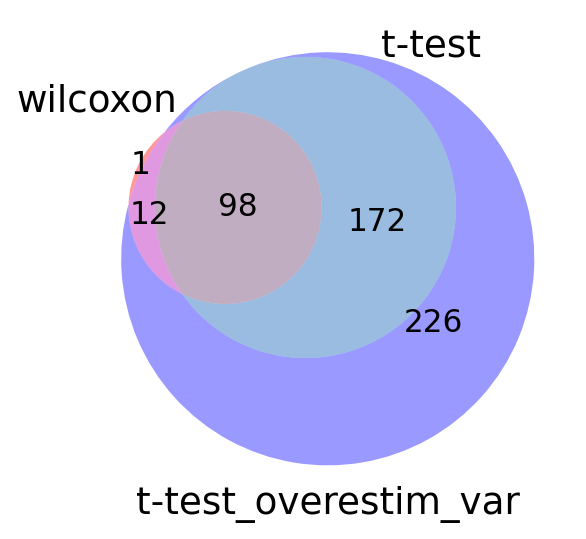

6 1 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 1 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 1 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


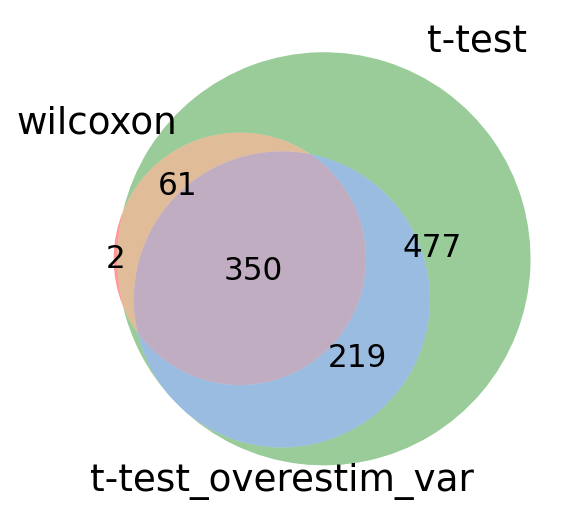

['0', '2']
0 2 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


0 2 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


0 2 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


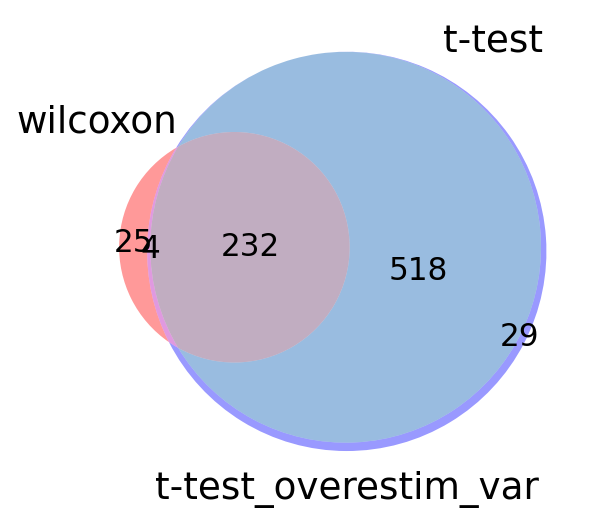

2 0 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 0 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 0 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


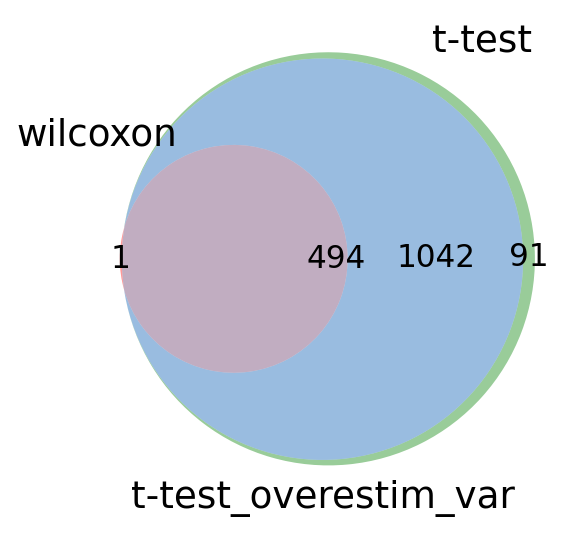

['1', '2']
1 2 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


1 2 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


1 2 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


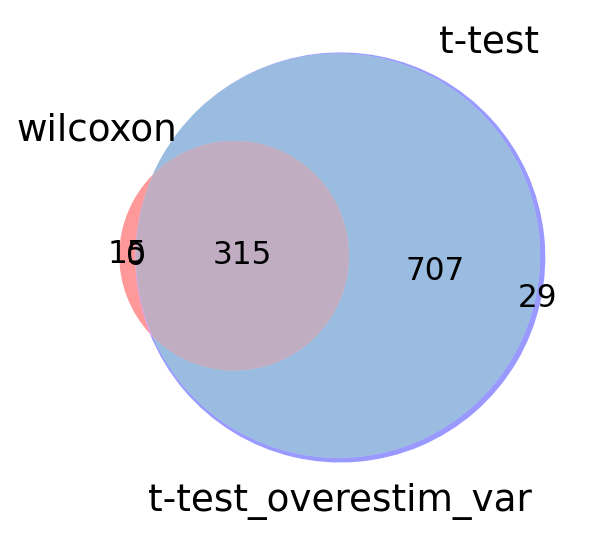

2 1 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 1 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 1 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


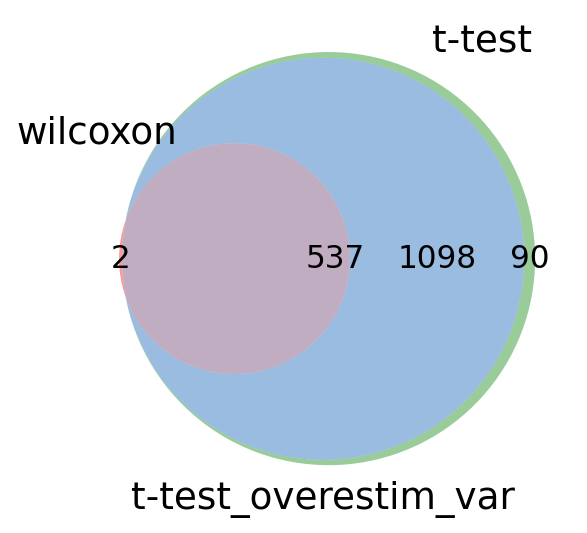

['2', '3']
2 3 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 3 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 3 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


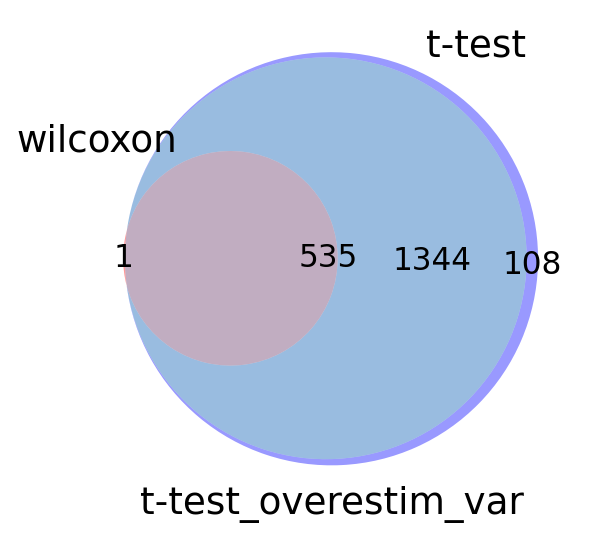

3 2 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


3 2 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


3 2 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


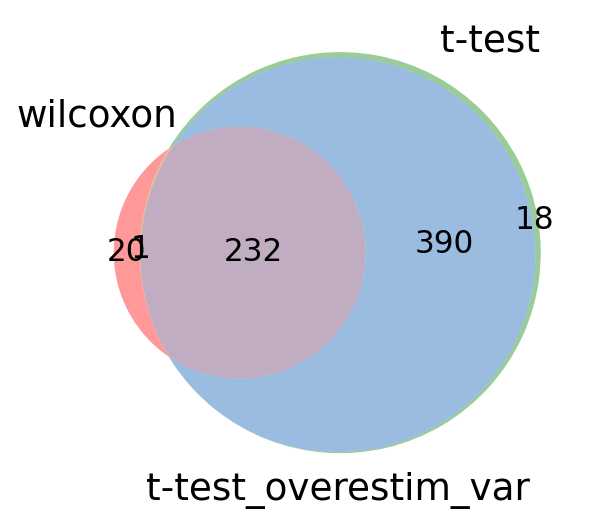

['2', '4']
2 4 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 4 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 4 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


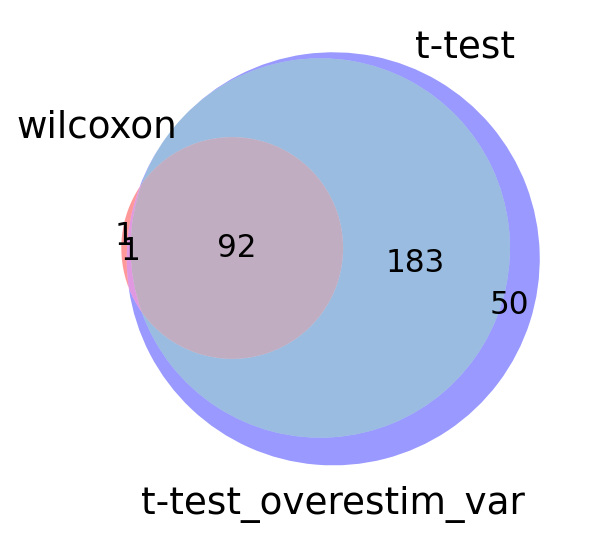

4 2 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 2 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 2 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


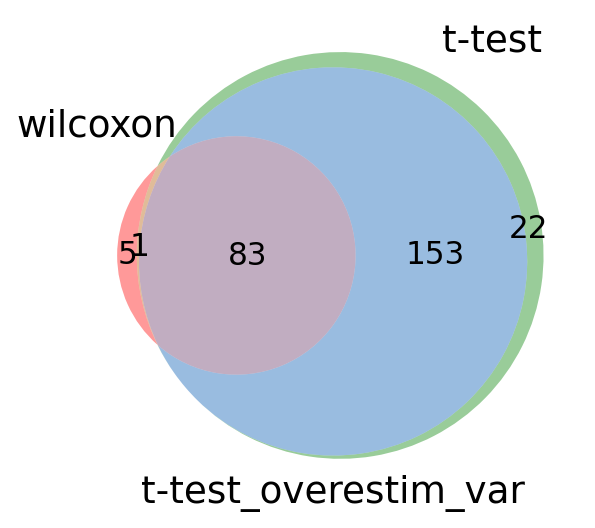

['2', '5']
2 5 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 5 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 5 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


2 5 Venn3 plotting error
5 2 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


5 2 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


5 2 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


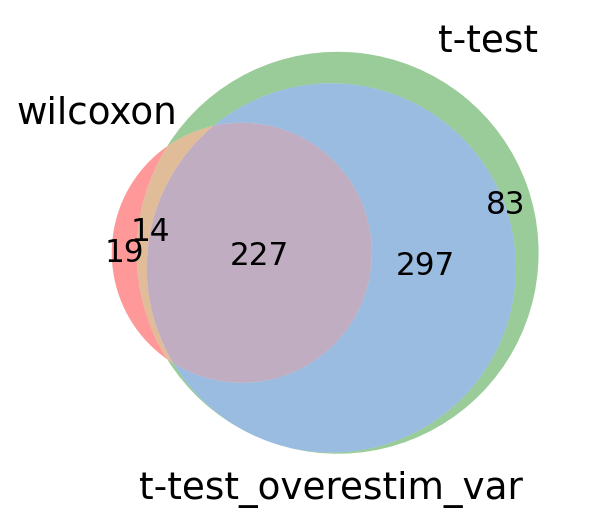

['2', '6']
2 6 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 6 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 6 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


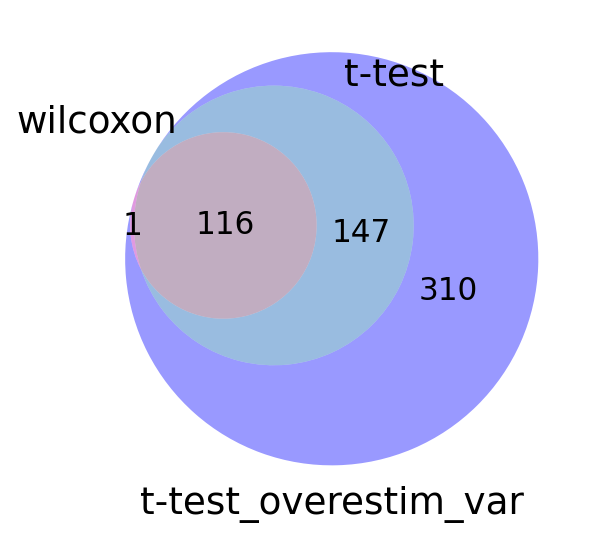

6 2 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 2 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 2 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


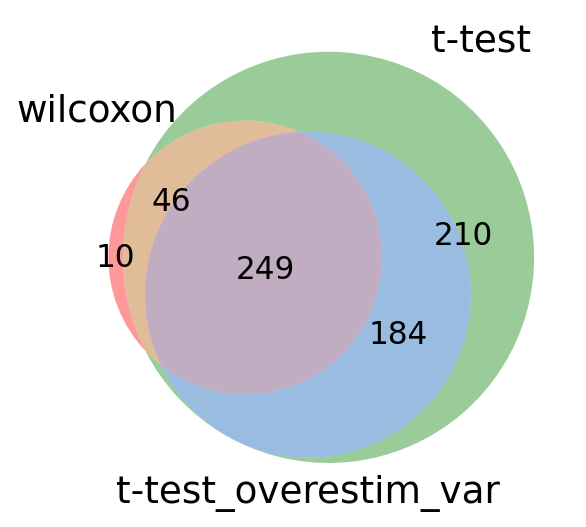

['0', '3']
0 3 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


0 3 t-test
0 3 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


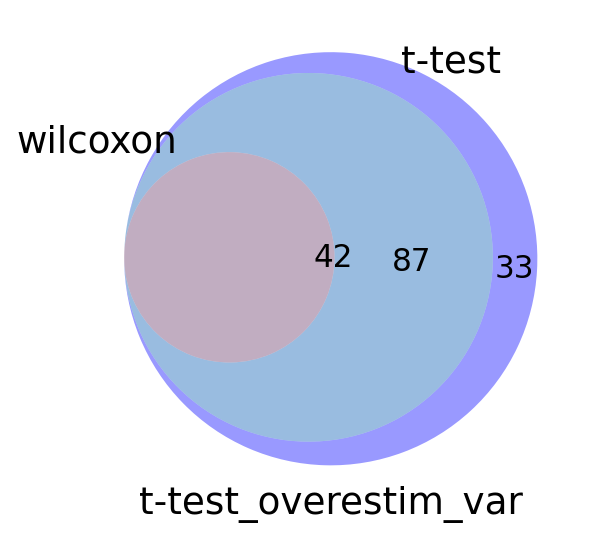

3 0 wilcoxon
3 0 t-test
3 0 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


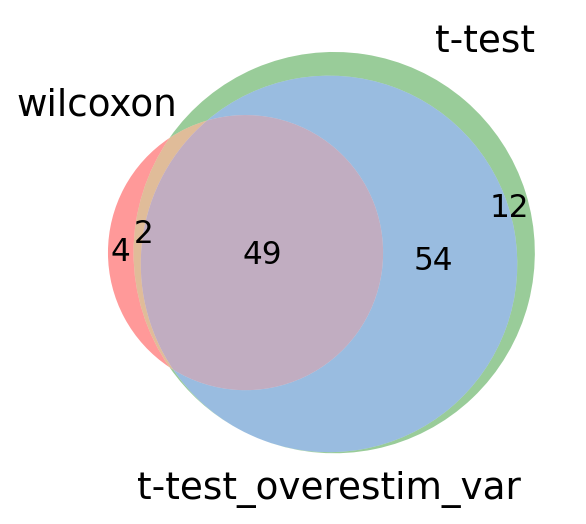

['1', '3']
1 3 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


1 3 t-test
1 3 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


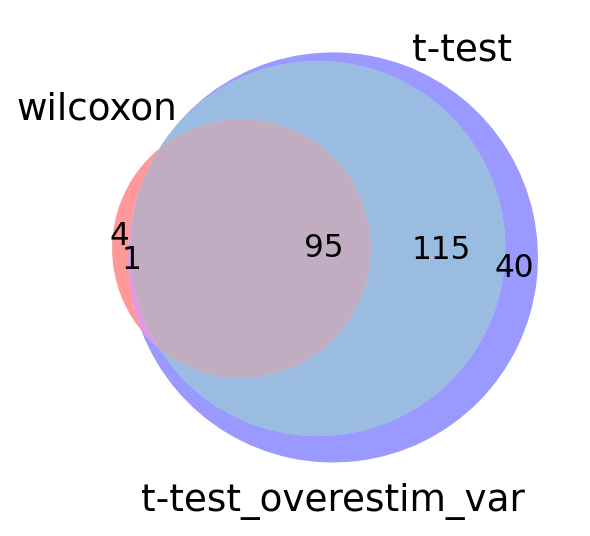

3 1 wilcoxon
3 1 t-test
3 1 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


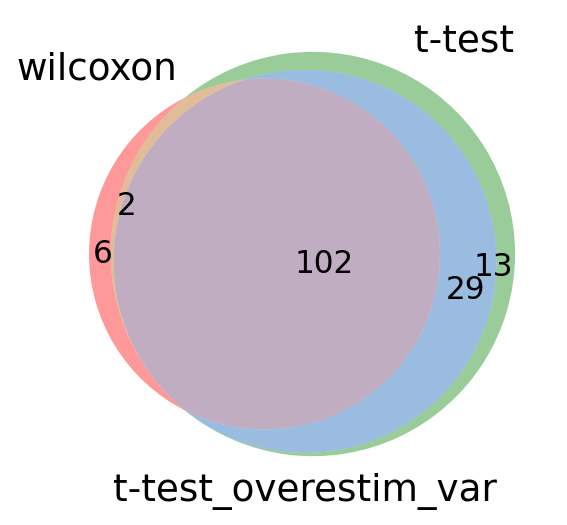

['2', '3']
2 3 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 3 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 3 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


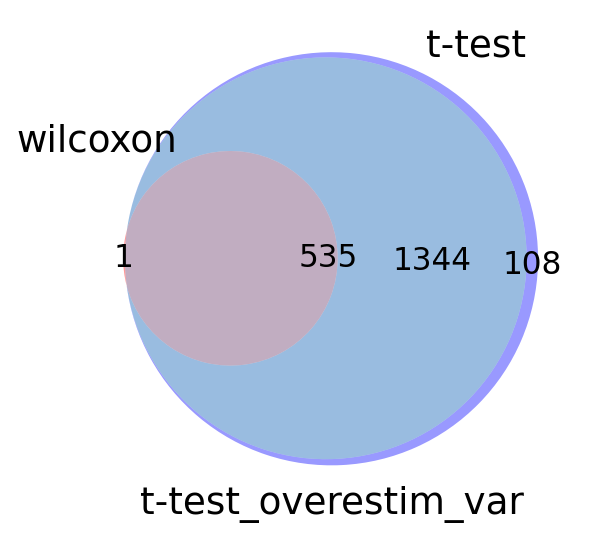

3 2 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


3 2 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


3 2 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


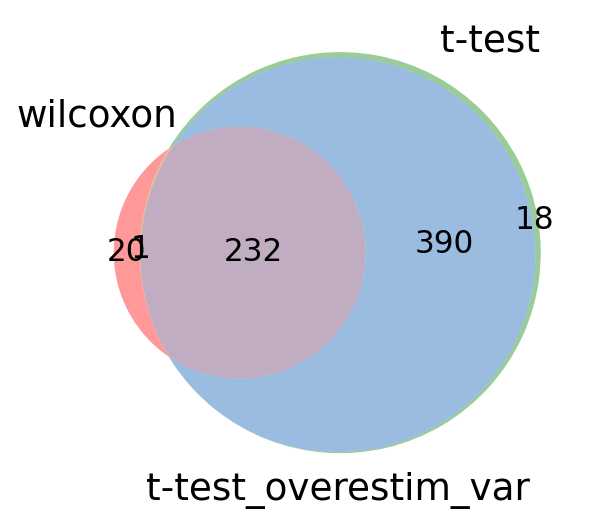

['3', '4']
3 4 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


3 4 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


3 4 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


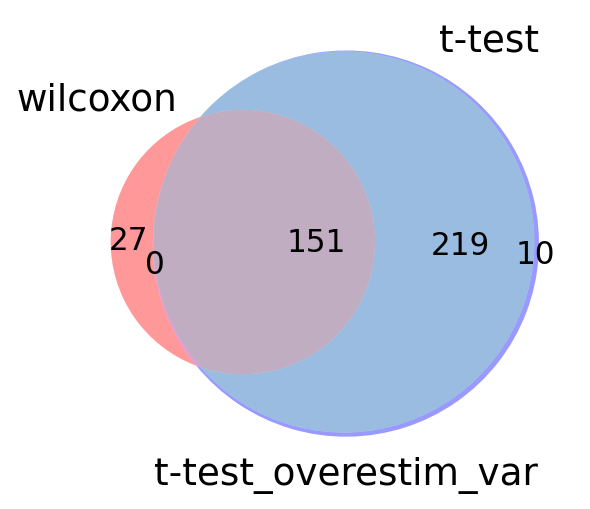

4 3 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 3 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 3 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


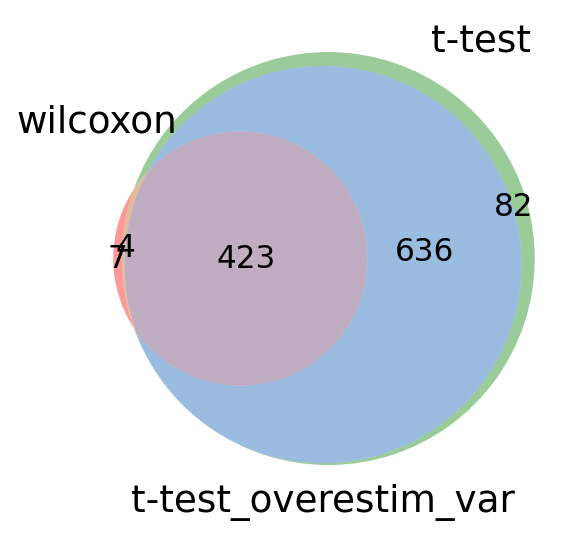

['3', '5']
3 5 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


3 5 t-test
3 5 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


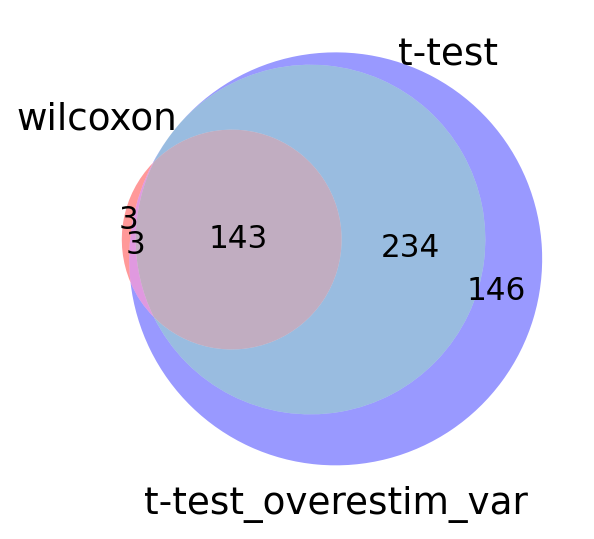

5 3 wilcoxon
5 3 t-test
5 3 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


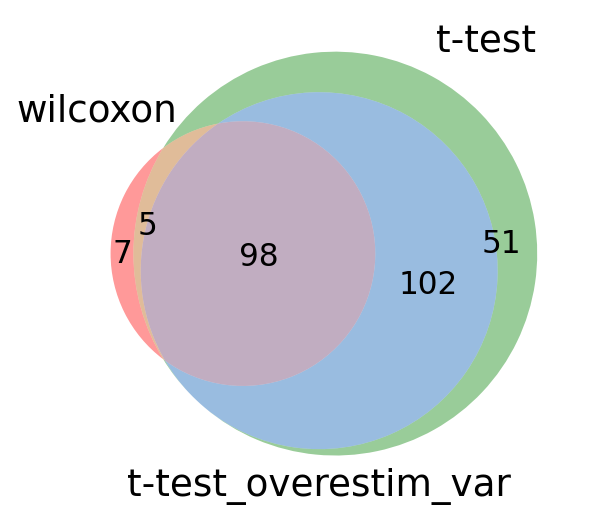

['3', '6']
3 6 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


3 6 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


3 6 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


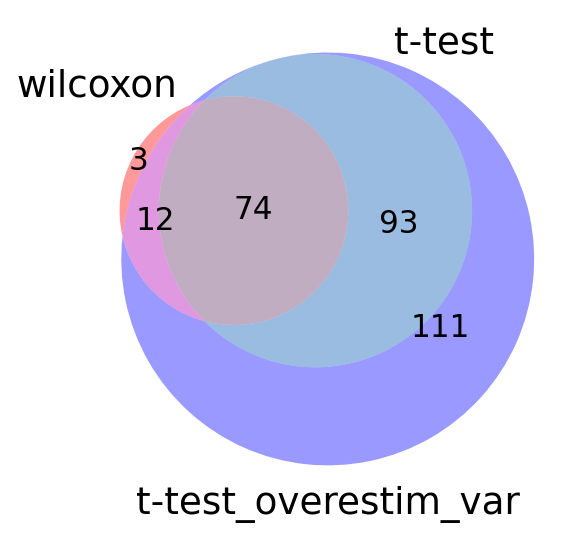

6 3 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 3 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 3 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


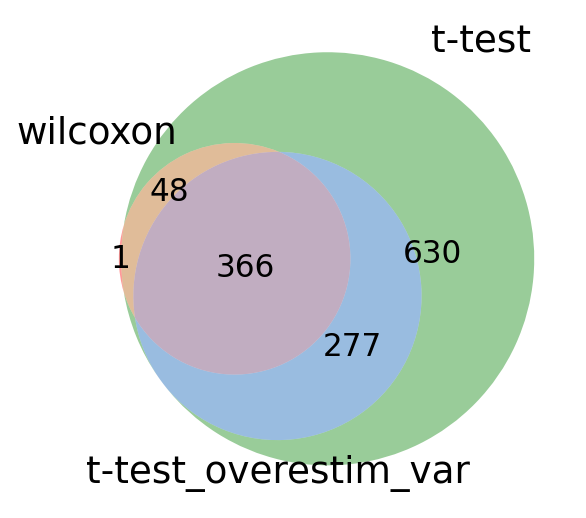

['0', '4']
0 4 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


0 4 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


0 4 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


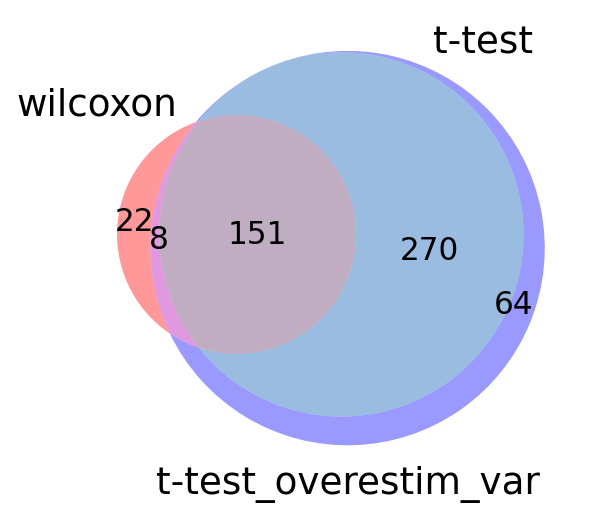

4 0 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 0 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 0 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


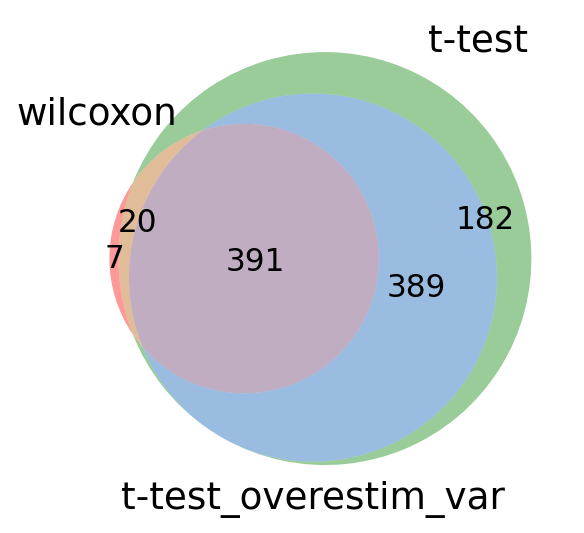

['1', '4']
1 4 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


1 4 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


1 4 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


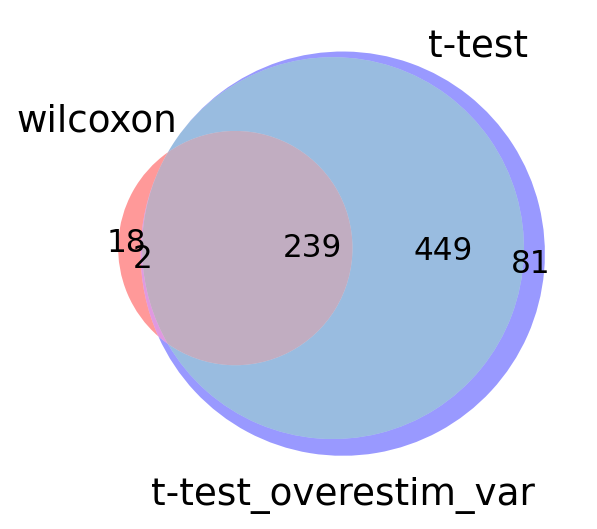

4 1 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 1 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 1 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


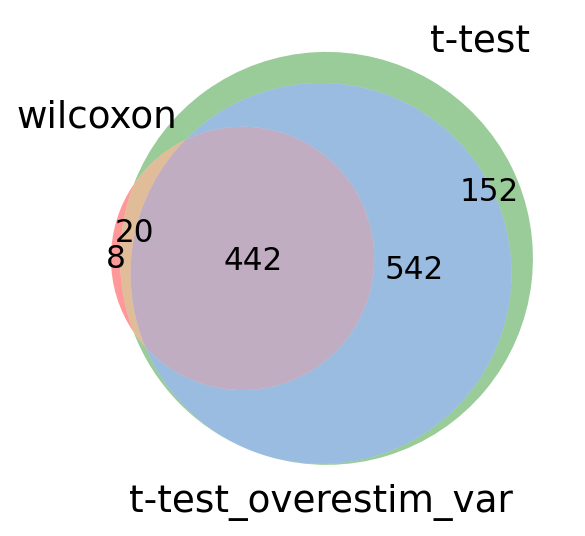

['2', '4']
2 4 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 4 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 4 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


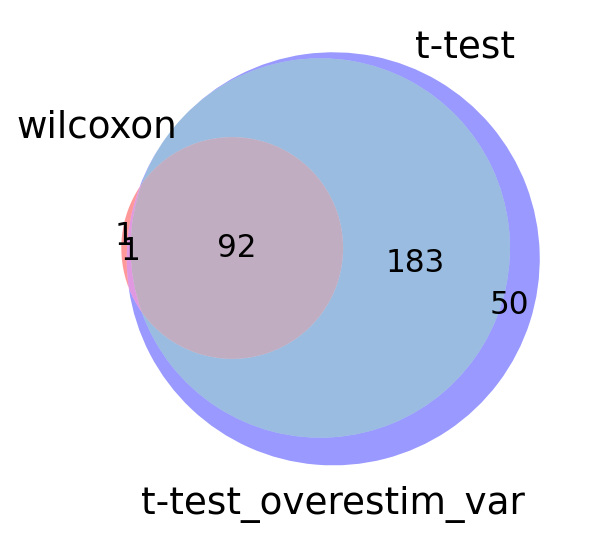

4 2 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 2 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 2 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


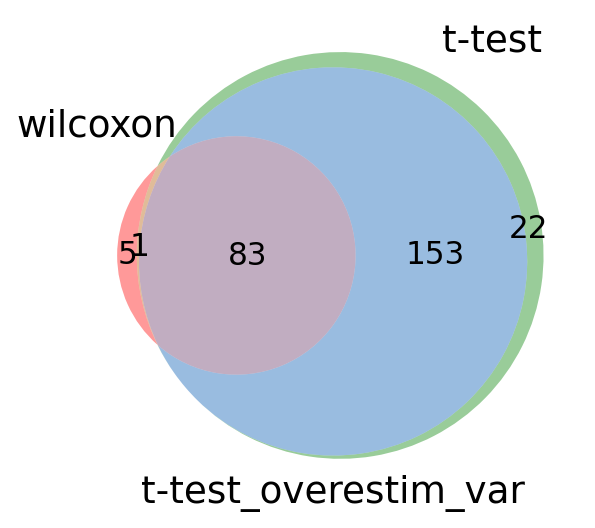

['3', '4']
3 4 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


3 4 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


3 4 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


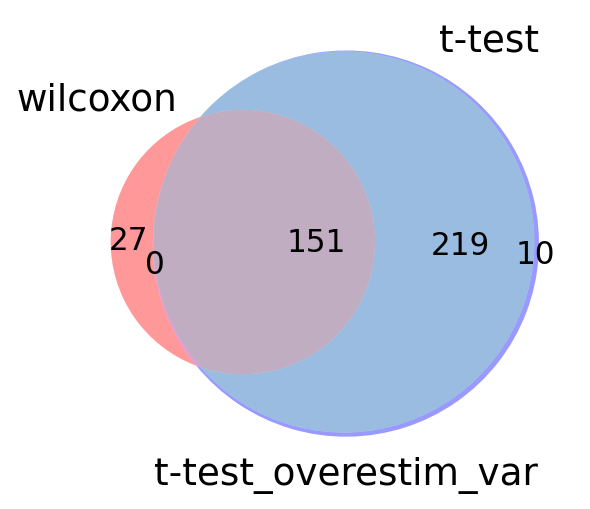

4 3 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 3 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 3 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


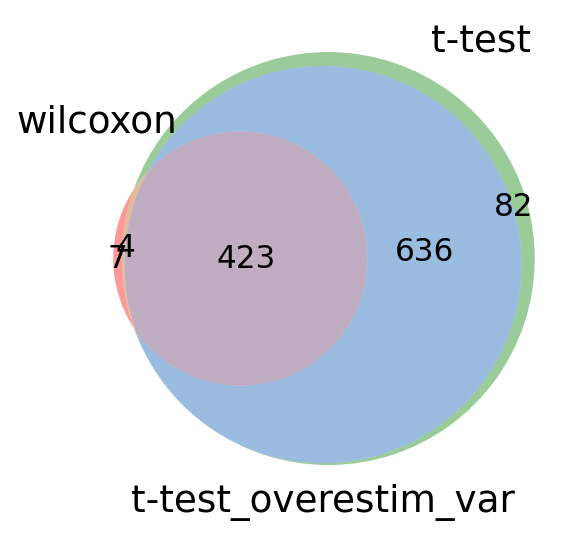

['4', '5']
4 5 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 5 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 5 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


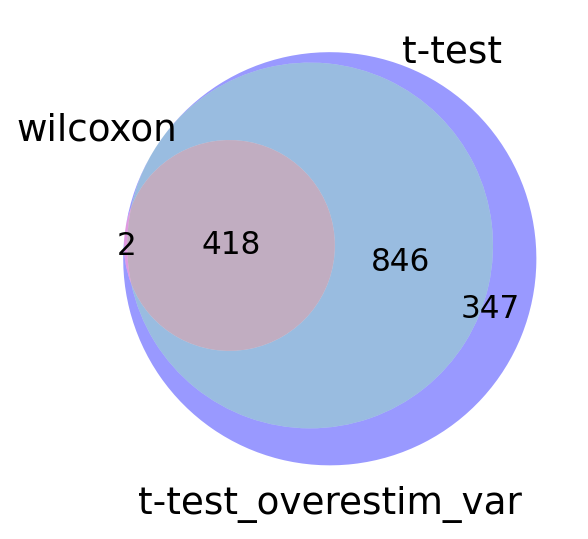

5 4 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


5 4 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


5 4 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


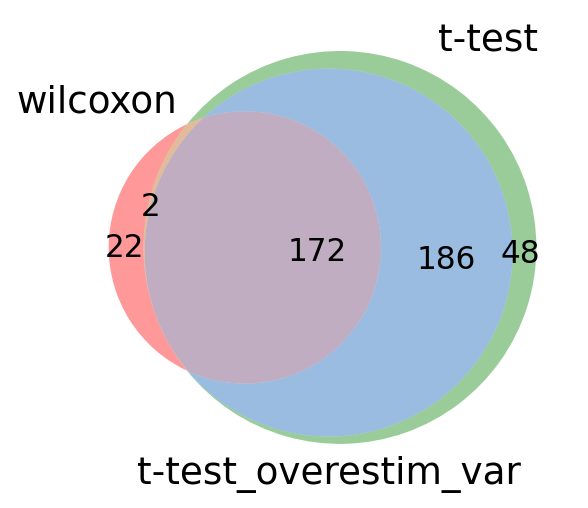

['4', '6']
4 6 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 6 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 6 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


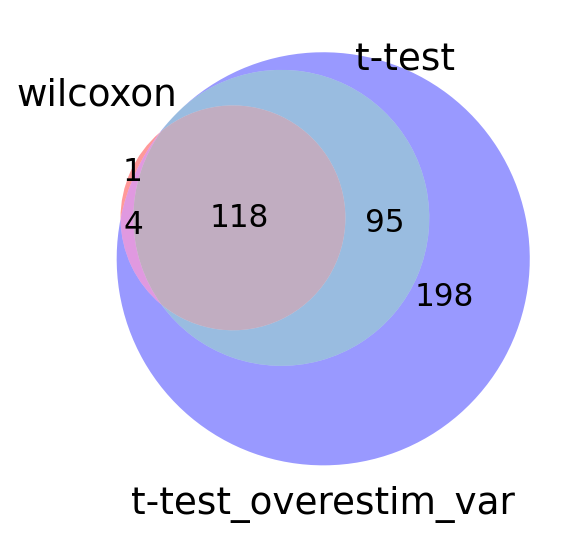

6 4 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 4 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 4 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


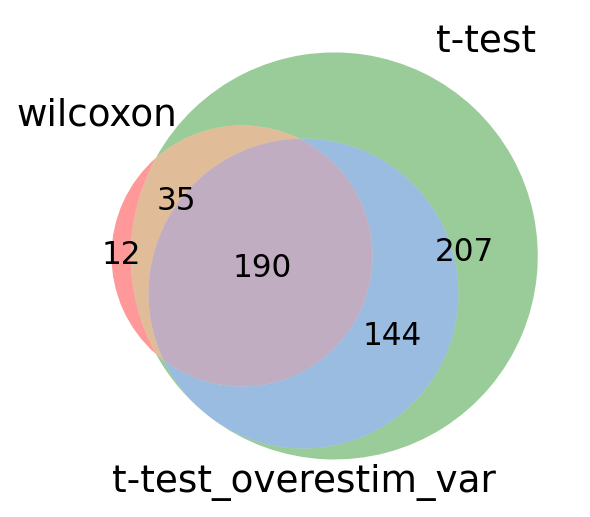

['0', '5']
0 5 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


0 5 t-test
0 5 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


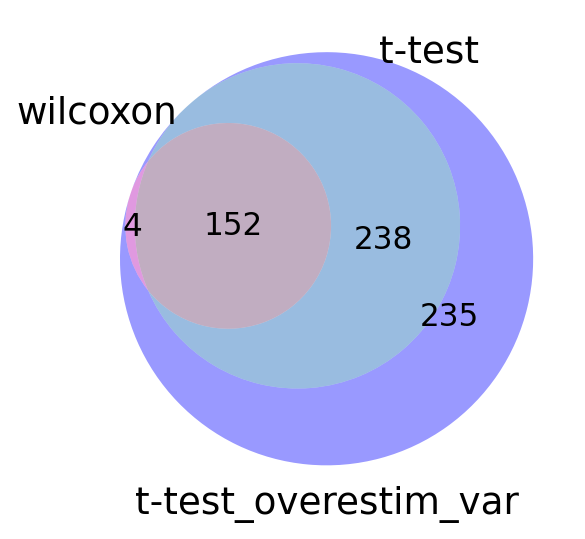

5 0 wilcoxon
5 0 t-test
5 0 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


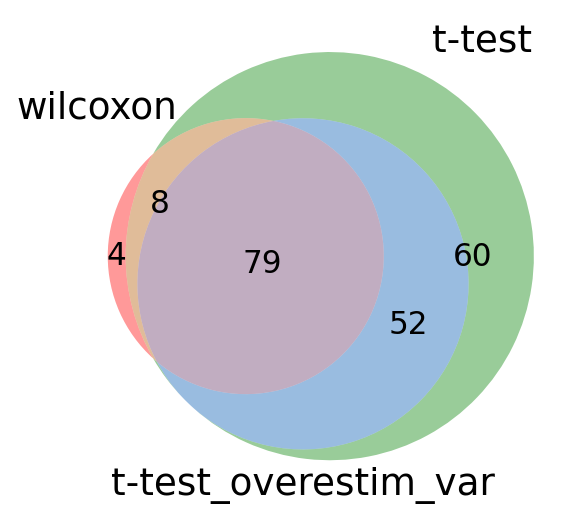

['1', '5']
1 5 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


1 5 t-test
1 5 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


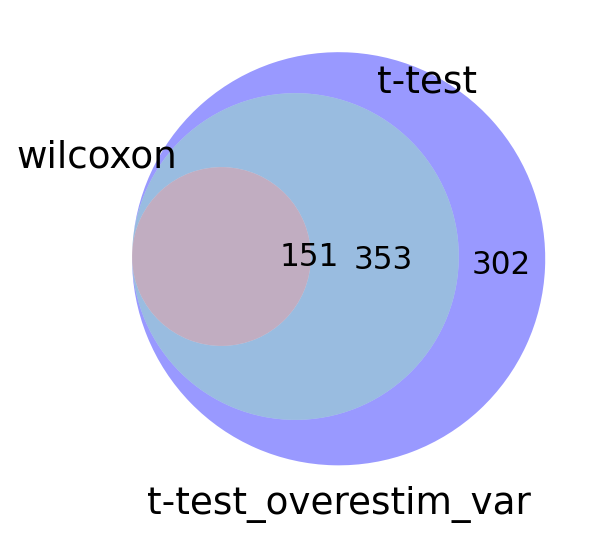

5 1 wilcoxon
5 1 t-test
5 1 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


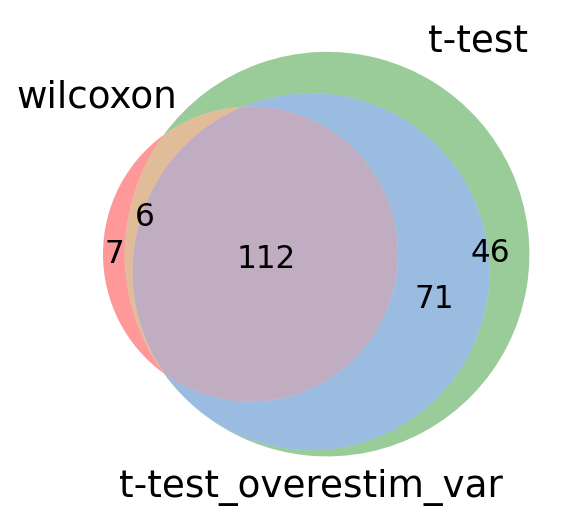

['2', '5']
2 5 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 5 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 5 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


2 5 Venn3 plotting error
5 2 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


5 2 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


5 2 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


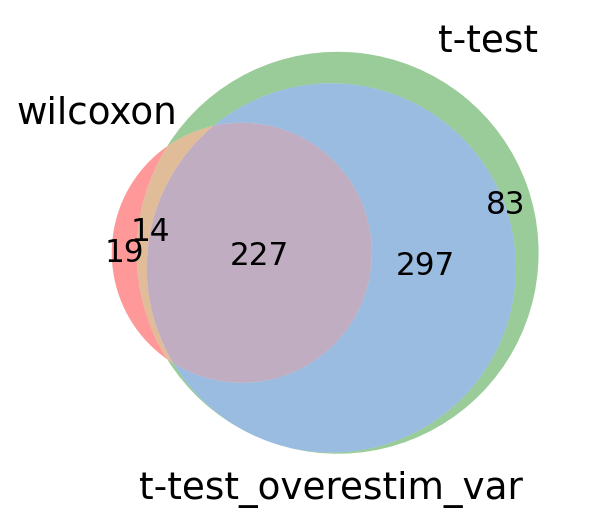

['3', '5']
3 5 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


3 5 t-test
3 5 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


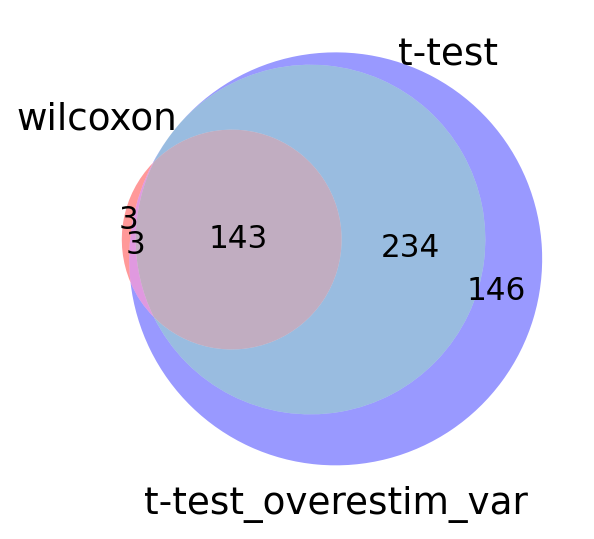

5 3 wilcoxon
5 3 t-test
5 3 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


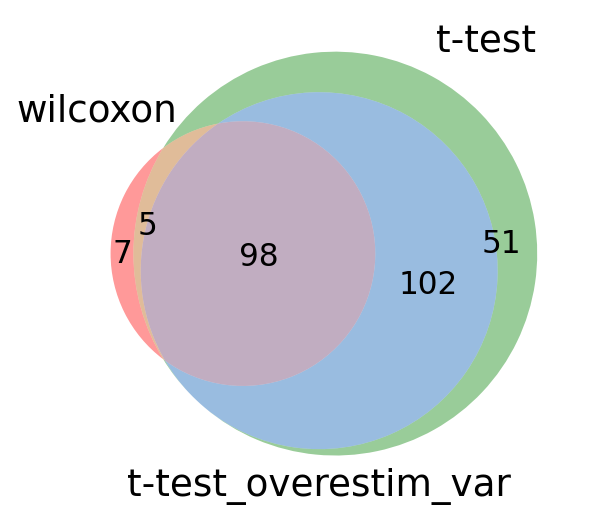

['4', '5']
4 5 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 5 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 5 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


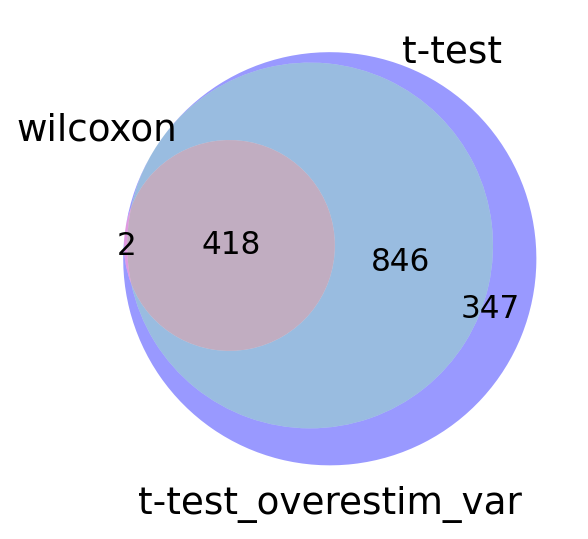

5 4 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


5 4 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


5 4 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


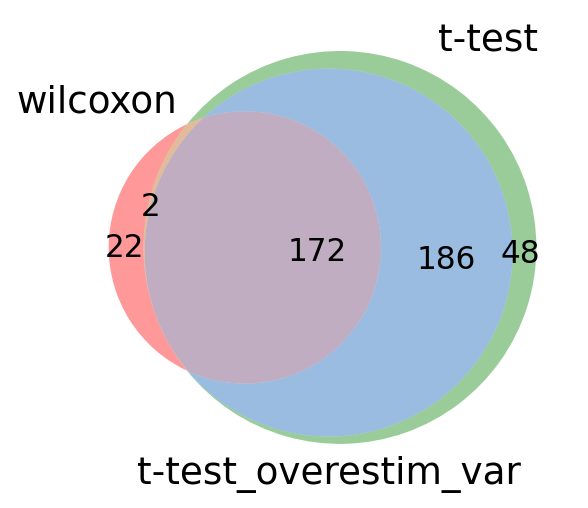

['5', '6']
5 6 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


5 6 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


5 6 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


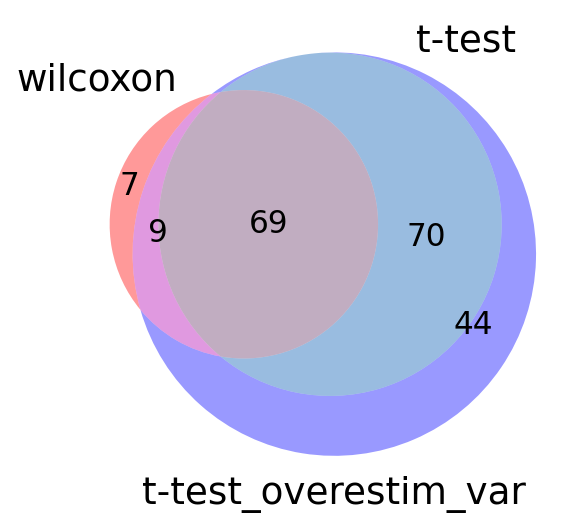

6 5 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 5 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 5 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


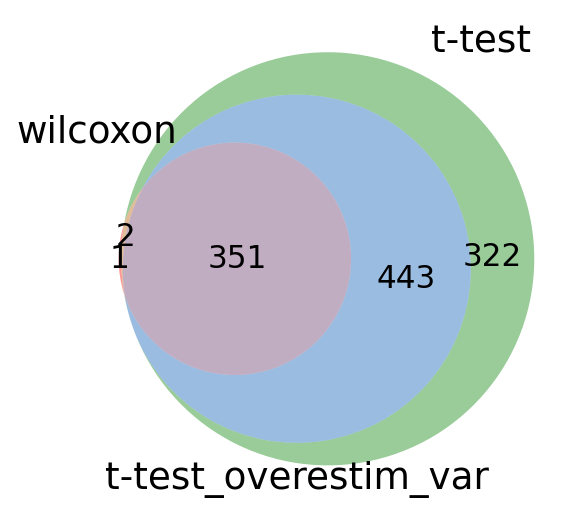

['0', '6']
0 6 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


0 6 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


0 6 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


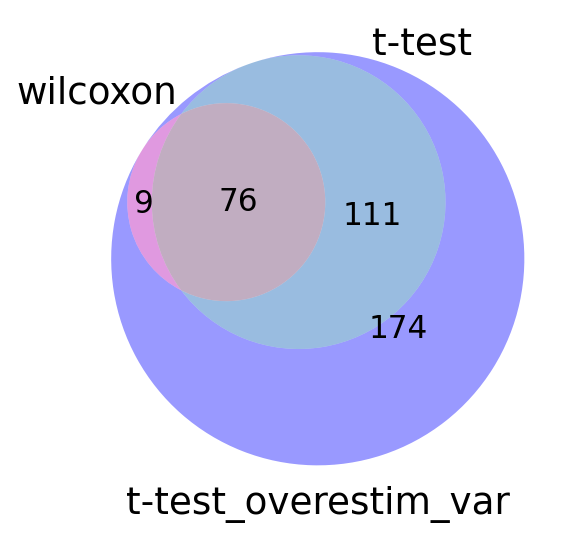

6 0 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 0 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 0 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


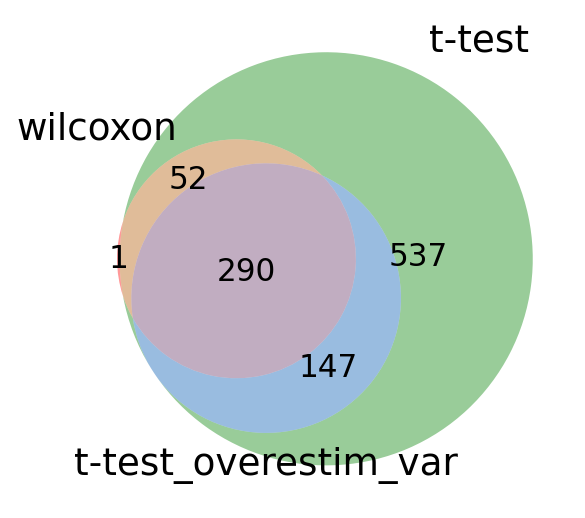

['1', '6']
1 6 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


1 6 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


1 6 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


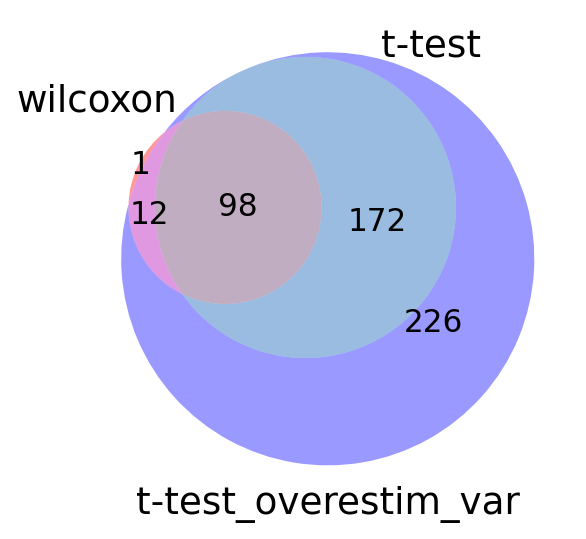

6 1 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 1 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 1 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


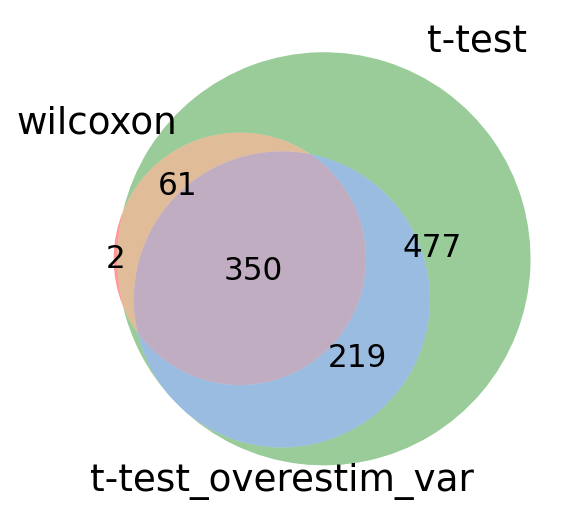

['2', '6']
2 6 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 6 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


2 6 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


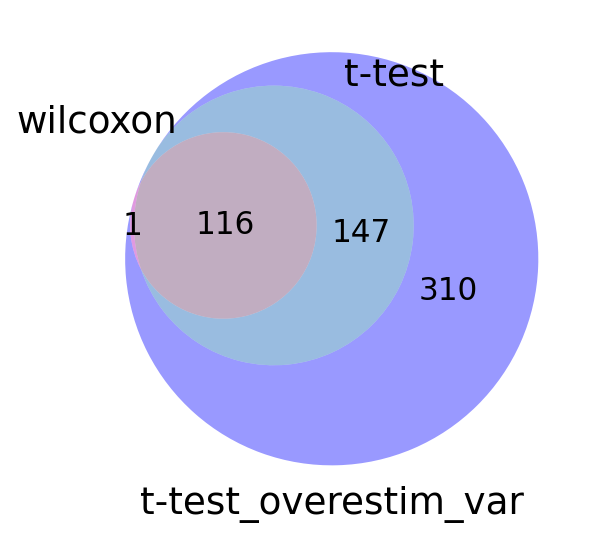

6 2 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 2 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 2 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


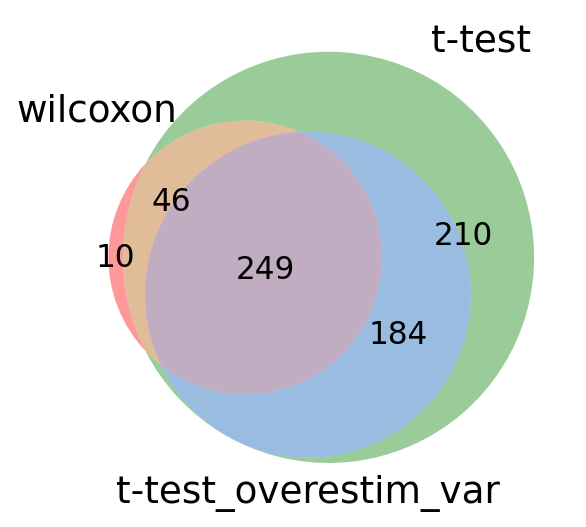

['3', '6']
3 6 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


3 6 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


3 6 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


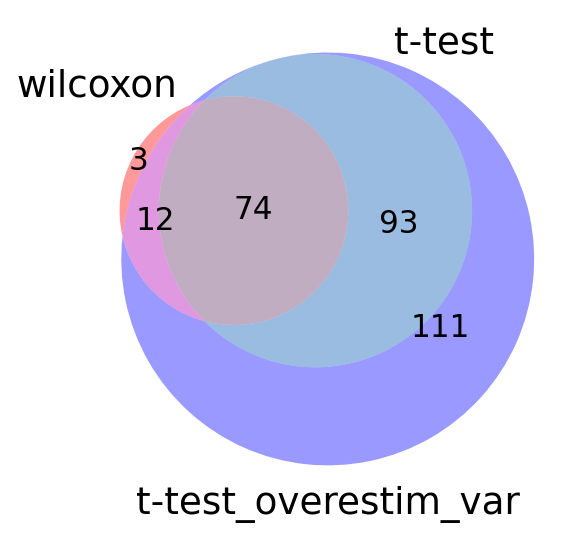

6 3 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 3 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 3 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


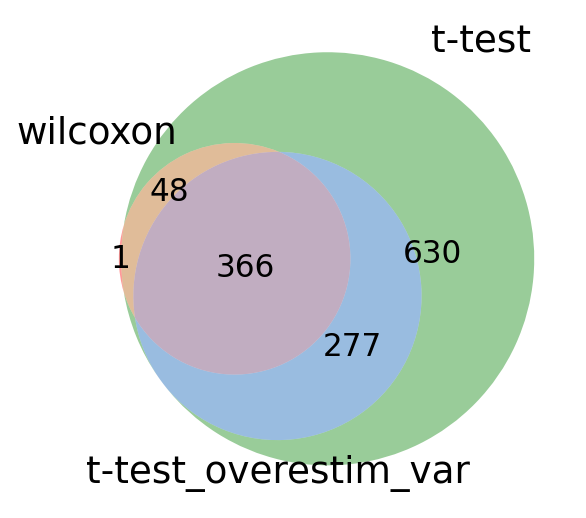

['4', '6']
4 6 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 6 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


4 6 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


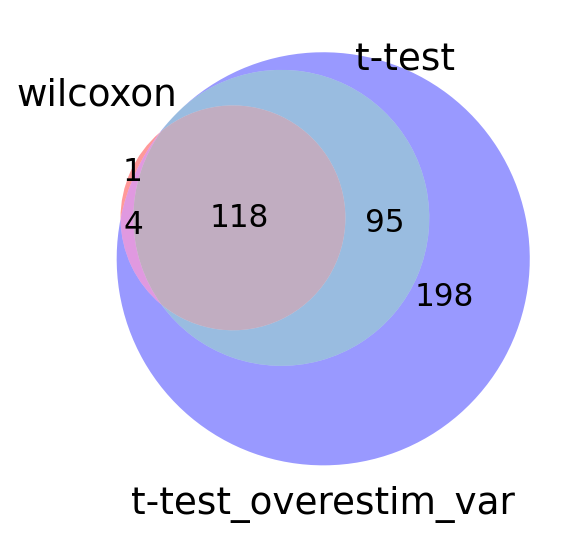

6 4 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 4 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 4 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


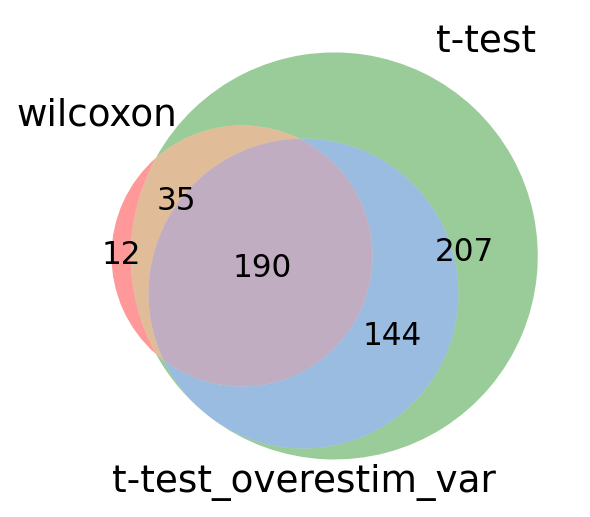

['5', '6']
5 6 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


5 6 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


5 6 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


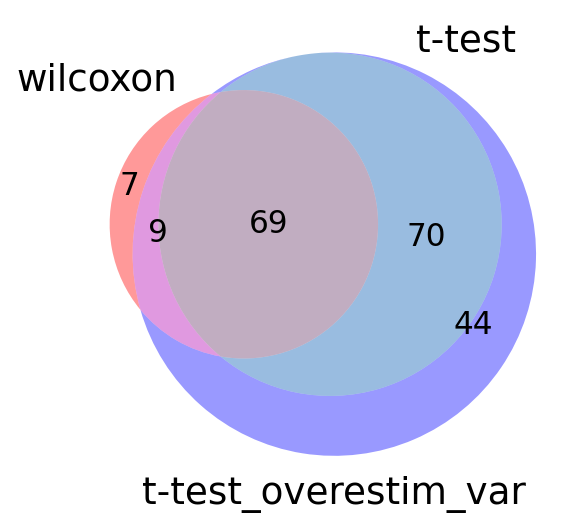

6 5 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 5 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


6 5 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


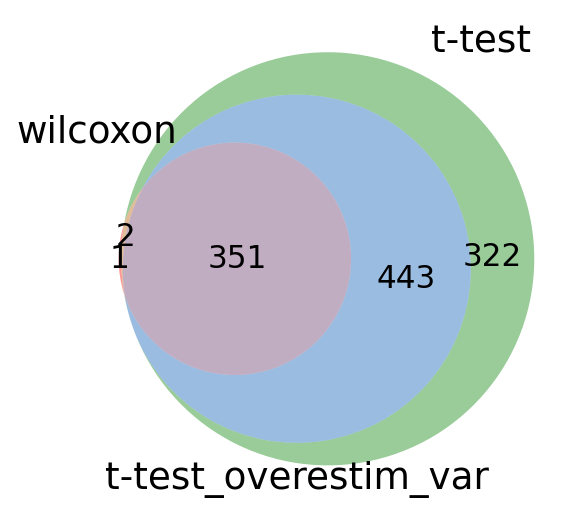

In [5]:
if True:
    # Working directory
    cp_dir = de_dir + '/cluster_vs_cluster'
    Path(cp_dir).mkdir(parents=True, exist_ok=True)

    ### Config
    obs_useCol = 'leiden'
    cps = ['wilcoxon', 't-test', 't-test_overestim_var']

    label_unique = [int(x) for x in list(set(adata.obs[obs_useCol]))]
    label_unique.sort()
    label_unique = [str(x) for x in label_unique]

    ### Compare
    for i in label_unique:
        for j in label_unique:
            if i != j:
                adata_ij = adata.copy()
                adata_ij = adata_ij[[True if x in [i,j] else False for x in adata_ij.obs[obs_useCol].values],:]
                sc_tl.multitest_venn(adata_ij, cps, obs_useCol, cp_dir)

# Group v.s. Group

['T_multi_G12', 'T_multi_G7']
T_multi_G12 T_multi_G7 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


T_multi_G12 T_multi_G7 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


T_multi_G12 T_multi_G7 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


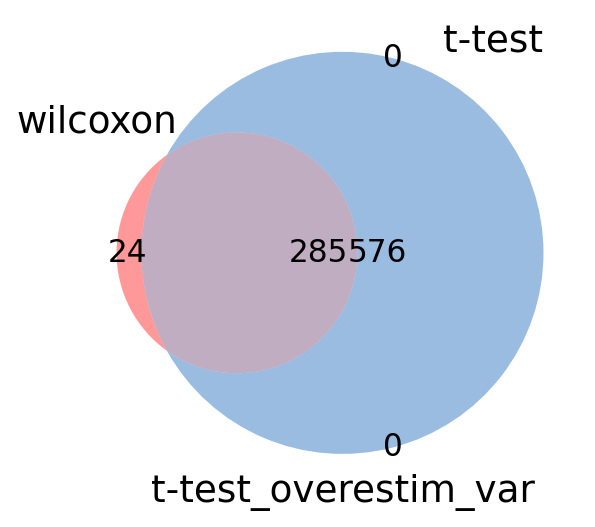

T_multi_G7 T_multi_G12 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


T_multi_G7 T_multi_G12 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


T_multi_G7 T_multi_G12 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


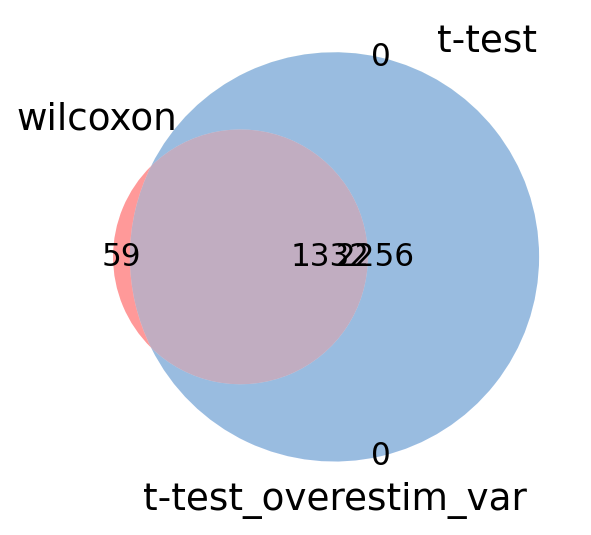

['T_multi_G12', 'T_multi_G9']
T_multi_G12 T_multi_G9 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


T_multi_G12 T_multi_G9 t-test
T_multi_G12 T_multi_G9 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


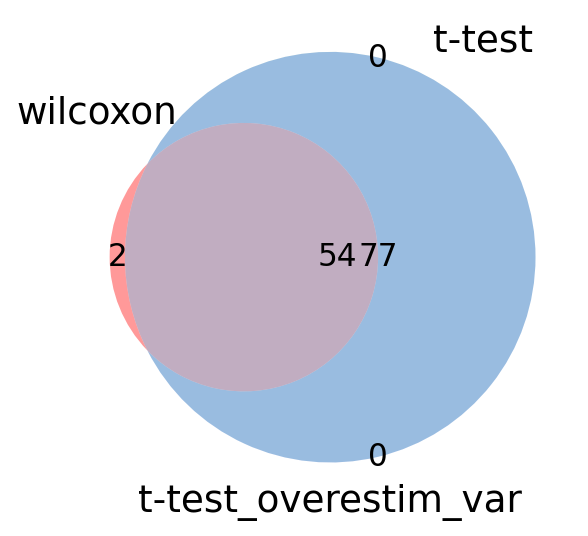

T_multi_G9 T_multi_G12 wilcoxon
T_multi_G9 T_multi_G12 t-test
T_multi_G9 T_multi_G12 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


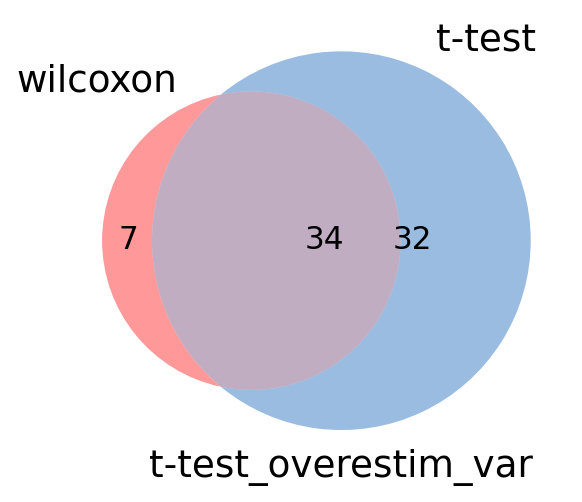

['T_multi_G12', 'T_multi_G7']
T_multi_G12 T_multi_G7 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


T_multi_G12 T_multi_G7 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


T_multi_G12 T_multi_G7 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


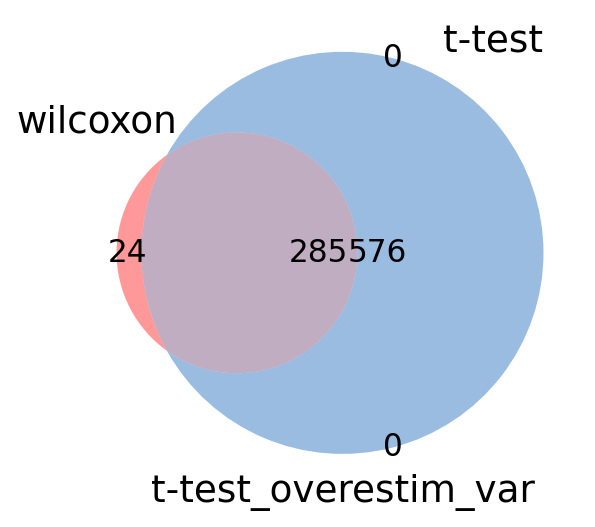

T_multi_G7 T_multi_G12 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


T_multi_G7 T_multi_G12 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


T_multi_G7 T_multi_G12 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


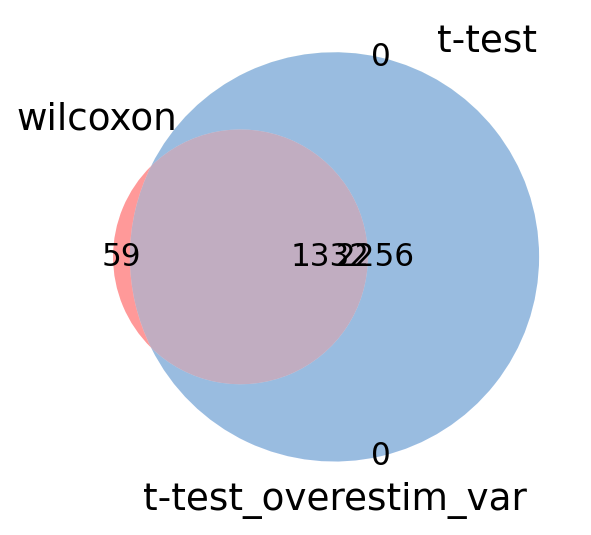

['T_multi_G7', 'T_multi_G9']
T_multi_G7 T_multi_G9 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


T_multi_G7 T_multi_G9 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


T_multi_G7 T_multi_G9 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


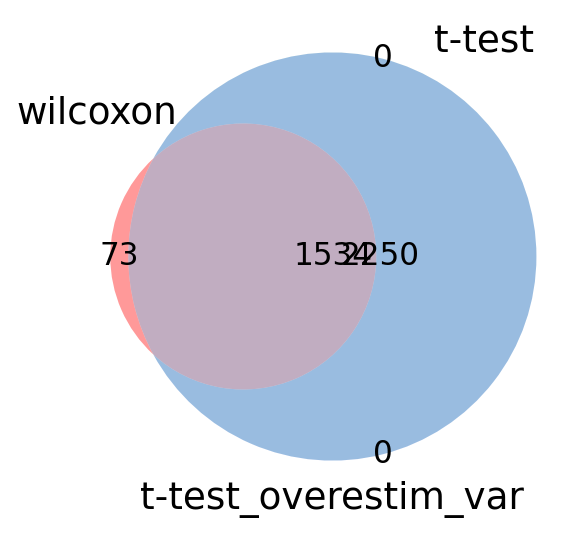

T_multi_G9 T_multi_G7 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


T_multi_G9 T_multi_G7 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


T_multi_G9 T_multi_G7 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


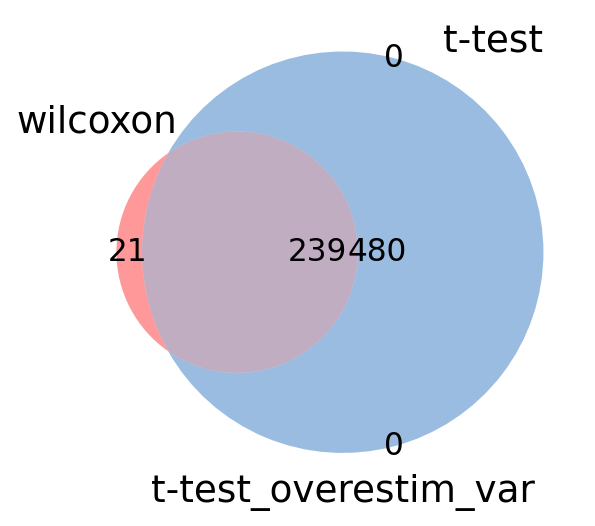

['T_multi_G12', 'T_multi_G9']
T_multi_G12 T_multi_G9 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


T_multi_G12 T_multi_G9 t-test
T_multi_G12 T_multi_G9 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


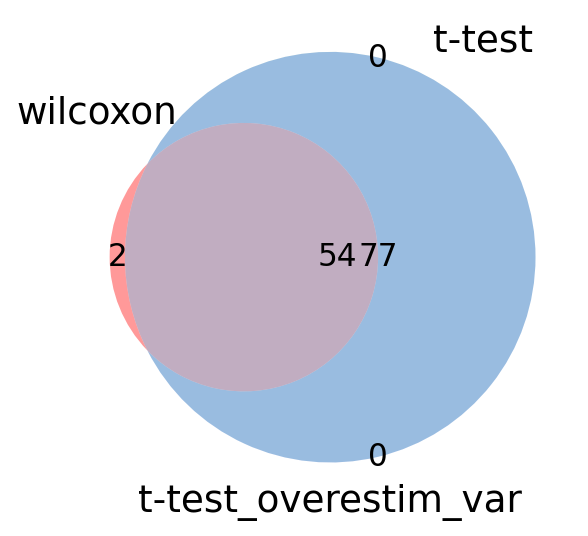

T_multi_G9 T_multi_G12 wilcoxon
T_multi_G9 T_multi_G12 t-test
T_multi_G9 T_multi_G12 t-test_overestim_var


/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


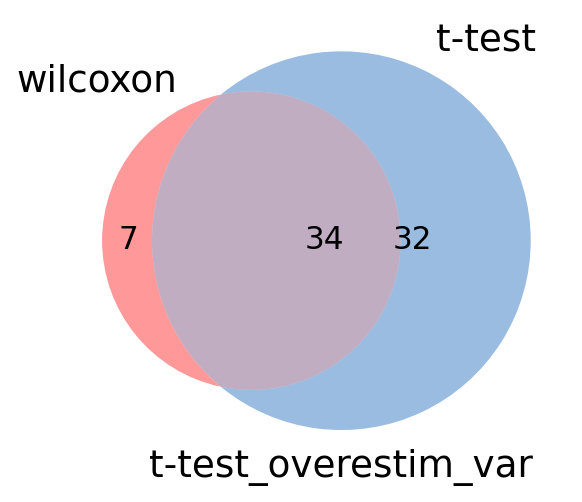

['T_multi_G7', 'T_multi_G9']
T_multi_G7 T_multi_G9 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


T_multi_G7 T_multi_G9 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


T_multi_G7 T_multi_G9 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


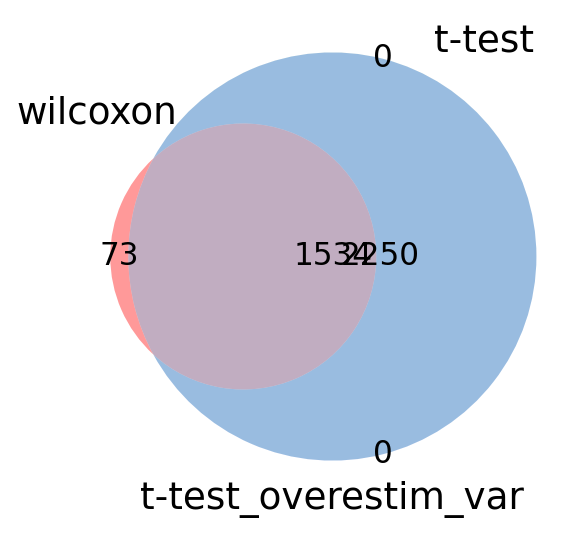

T_multi_G9 T_multi_G7 wilcoxon


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


T_multi_G9 T_multi_G7 t-test


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


T_multi_G9 T_multi_G7 t-test_overestim_var


/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/mnt/efs/hdiao/miniconda3/envs/scPy/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/mnt/efs/hdiao/Projects/Tools/sc_tl.py:197: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  genes_df_l_t.to_csv("%s_vs_%s_differential.csv"%(l_t_1, l_t_2), index=False)


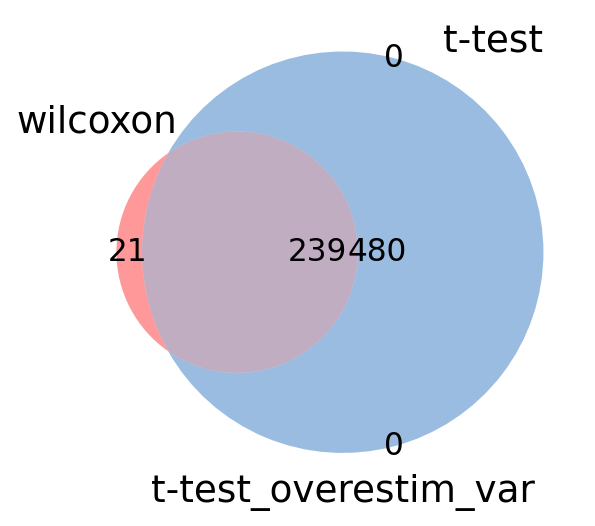

In [6]:
if True:
    # Working directory
    cp_dir = de_dir + '/group_vs_group'
    Path(cp_dir).mkdir(parents=True, exist_ok=True)

    ### Config
    obs_useCol = 'group'
    cps = ['wilcoxon', 't-test', 't-test_overestim_var']

    label_unique = [str(x) for x in list(set(adata.obs[obs_useCol]))]
    label_unique.sort()
    label_unique = [str(x) for x in label_unique]

    ### Compare
    for i in label_unique:
        for j in label_unique:
            if i != j:
                adata_ij = adata.copy()
                adata_ij = adata_ij[[True if x in [i,j] else False for x in adata_ij.obs[obs_useCol].values],:]
                sc_tl.multitest_venn(adata_ij, cps, obs_useCol, cp_dir)

## Filter DE output (remove low expr genes)

In [ ]:
de_files = glob.glob("%s/**/*differential.csv"%de_dir, recursive=True)
for de_file in de_files:
    pd.read_csv(de_file, index_col=0).loc[flt_genes].to_csv(de_file.replace(".csv","_clean.csv"))